In [1]:
### Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Dell\AppData\Local\Temp\ipykernel_28140\933189958.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [26]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Research Analysis/final_full_dataset_Descriptives.csv")
df.head()

,Hospital,Main Unit,Age,Gender,Ethnicity,Highest Educational Level,Marital Status,Have Children?,No. of Children have,Age of the youngest child,...,Cleanliness,Safety,Availability and accessibility,Sufficient rest areas,BMI,P/N Ratio,CS_Score,BO_Score,STS_Score,Weight
0,DMH,Inward,29,Female,Sinhala,Diploma in Nursing,Married,Yes,1,Less than 1 yr,...,High,High,High,High,17.777778,20.000000,42,35,29,21.702
1,DMH,Inward,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,Very high,Very high,Very high,Very high,25.299376,2.058824,48,42,40,21.702
2,DMH,Inward,28,Female,Sinhala,BSc. Nursing,Married,No,999,Not relevant,...,High,High,Average,Average,22.313278,2.000000,32,33,35,21.702
3,DMH,Inward,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,3,4 - 7 yrs,...,High,High,High,Low,25.631168,1.750000,45,39,33,21.702
4,DMH,Inward,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,High,High,High,High,22.666667,1.764706,42,44,37,21.702


In [27]:
df.columns.tolist()

['Hospital',
 'Main Unit',
 'Age',
 'Gender',
 'Ethnicity',
 'Highest Educational Level',
 'Marital Status',
 'Have Children?',
 'No. of Children have',
 'Age of the youngest child',
 'Monthly Family Income',
 'Daily travelling Distance',
 'Transport Mode',
 'Mental Health Rate',
 'Physical Health Rate',
 'Hours of Sleeping',
 'Work Experience in this Hospital',
 'Full work Experience as a Nurse',
 'Total Working Hours in a Week',
 'Night Shifts per Month',
 'Monthly Salary Income',
 'Relationship with the Superiors',
 'Support from other Nurses',
 'Support from the Minor Staff',
 'Support from the Hospital Administration',
 'Support from the family',
 'Support from friends',
 'Support from the Superiors',
 'Frequency of involving patient emergencies',
 'Frequency of exposure to patients death',
 'Frequency of facing struggles with patients',
 'Cleanliness',
 'Safety',
 'Availability and accessibility',
 'Sufficient rest areas',
 'BMI',
 'P/N Ratio',
 'CS_Score',
 'BO_Score',
 'STS_Sco

C:\Users\Dell\AppData\Local\Temp\ipykernel_28140\2275899742.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Night Shifts per Month'] = pd.Categorical(filtered_df['Night Shifts per Month'], categories=order, ordered=True)


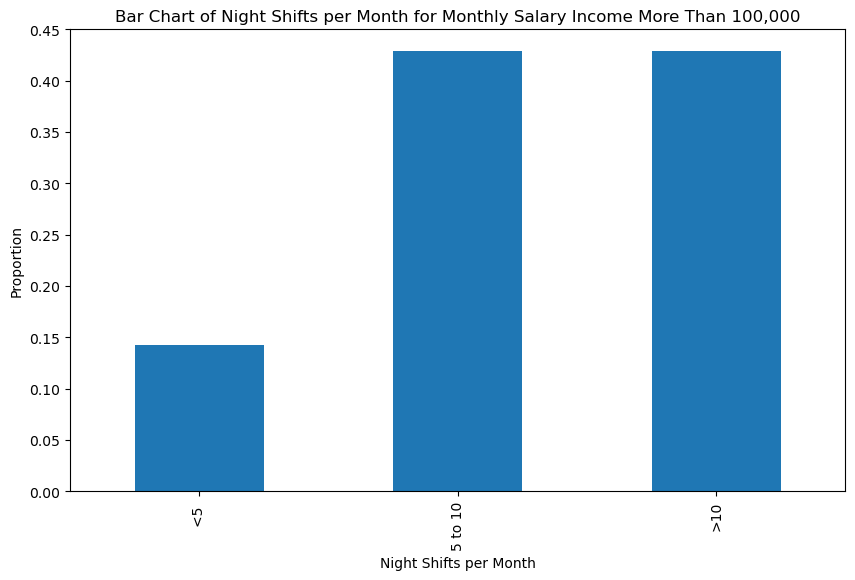

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Monthly Salary Income' and 'Night Shifts per Month'
filtered_df = df[df['Monthly Salary Income'] == 'More than 100,000']

# Define the order
order = ['<5 ', '5 to 10', '>10']

# Convert 'Night Shifts per Month' to a categorical type with the specified order
filtered_df['Night Shifts per Month'] = pd.Categorical(filtered_df['Night Shifts per Month'], categories=order, ordered=True)

# Calculate proportions
proportions = filtered_df['Night Shifts per Month'].value_counts(normalize=True).sort_index()

# Plotting
plt.figure(figsize=(10,6))
proportions.plot(kind='bar')
plt.xlabel('Night Shifts per Month')
plt.ylabel('Proportion')
plt.title('Bar Chart of Night Shifts per Month for Monthly Salary Income More Than 100,000')
plt.show()

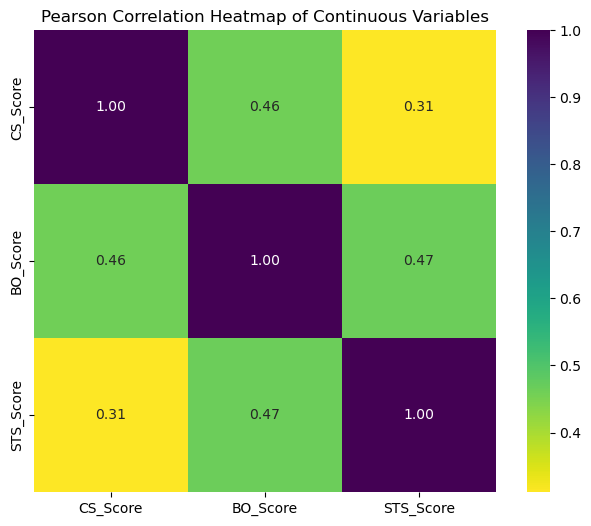

In [5]:
# Calculate Pearson correlation matrix
correlation_matrix = df[['CS_Score', 'BO_Score', 'STS_Score']].corr()

# Create a heatmap with a reversed colormap and smaller size
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt=".2f", square=True)

# Show the plot
plt.title('Pearson Correlation Heatmap of Continuous Variables')
plt.show()


In [6]:
# Get the counts of each level of the nominal variable
counts = df['Cleanliness'].value_counts()

# Print the counts
print(counts)

Cleanliness
High         235
Very high    107
Average       26
Name: count, dtype: int64


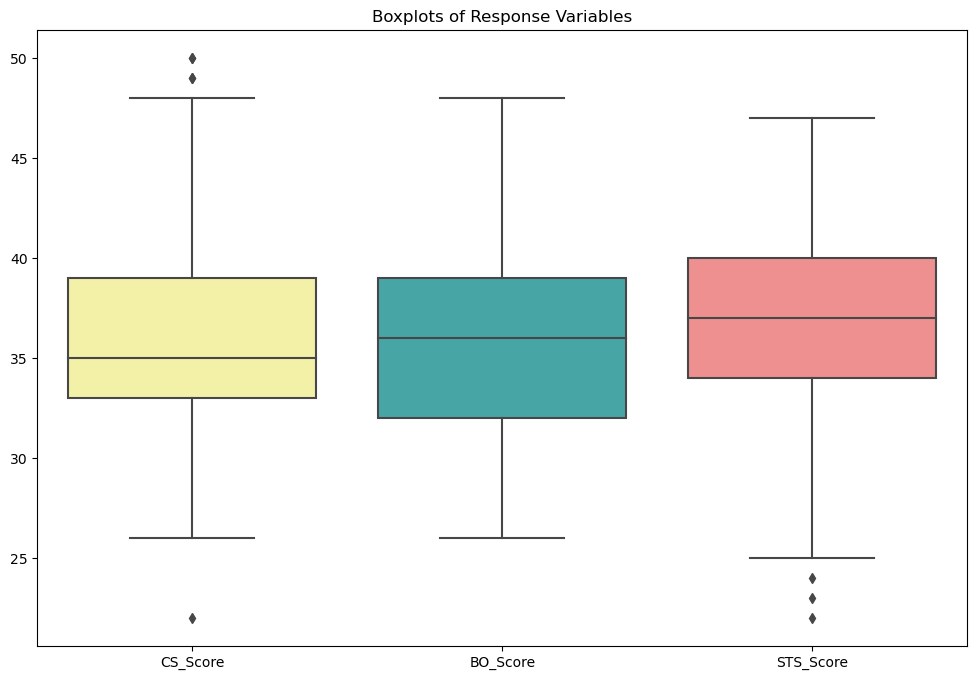

In [7]:
response_variables = ['CS_Score','BO_Score','STS_Score']
custom_colors = ["#FFFC9B", "#37B5B6", "#FF8080"]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[response_variables], palette=custom_colors)
plt.title('Boxplots of Response Variables')
plt.show()

## CS score

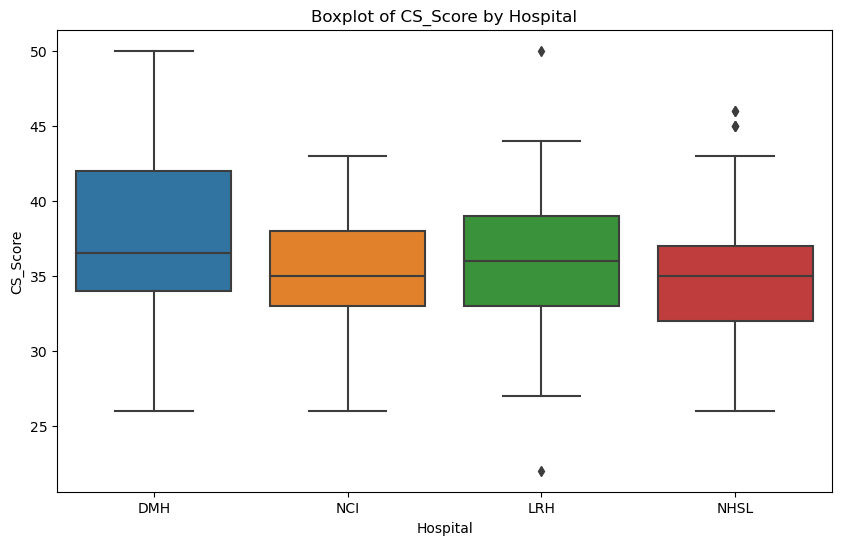

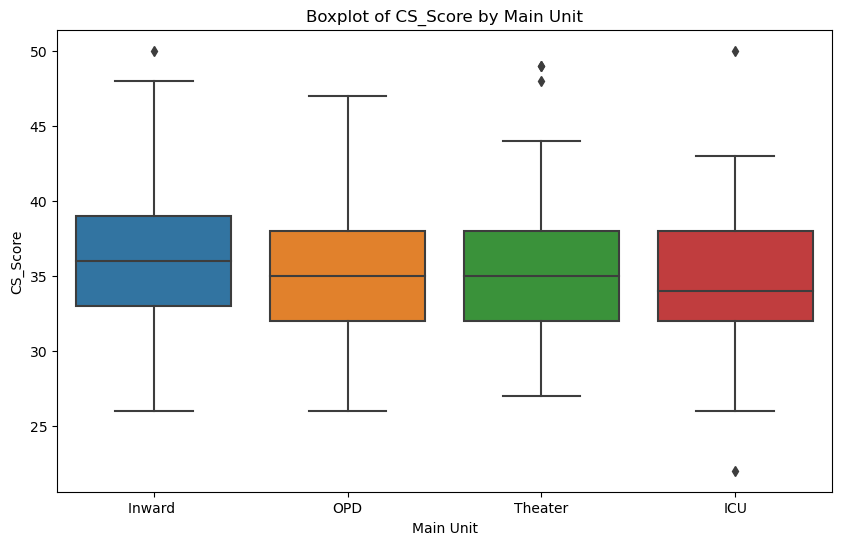

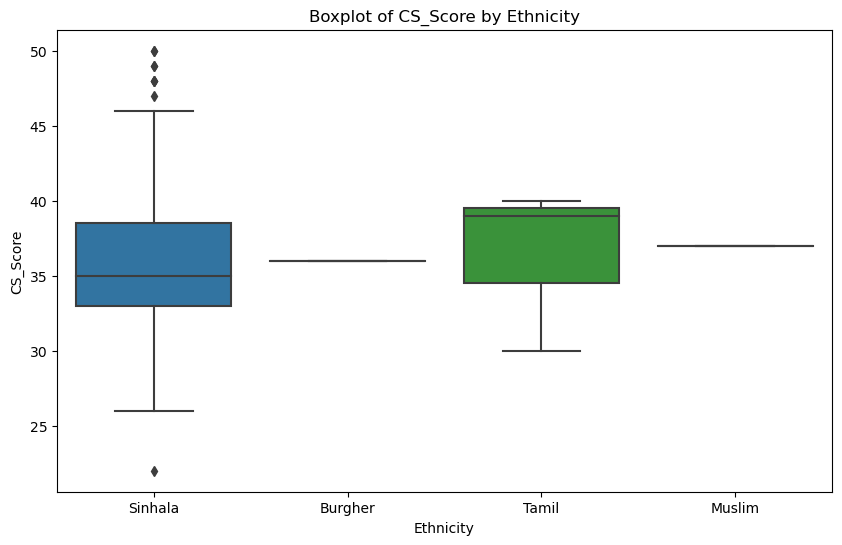

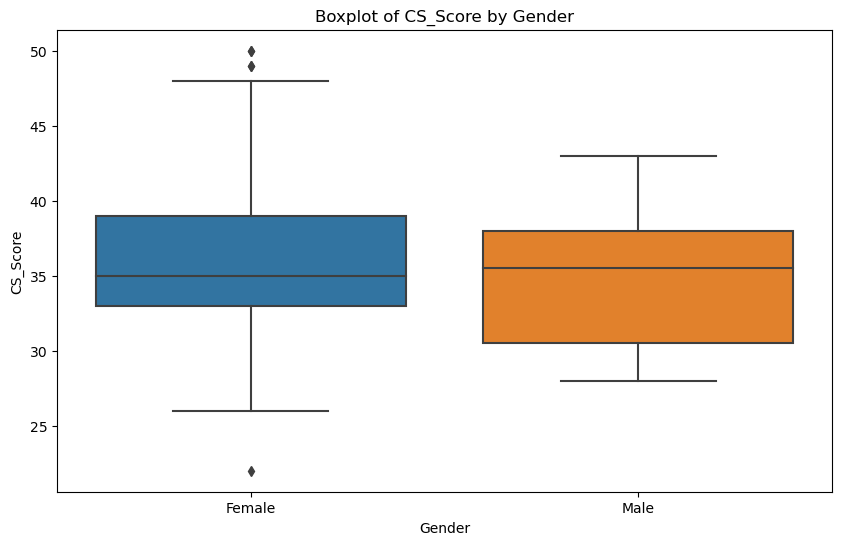

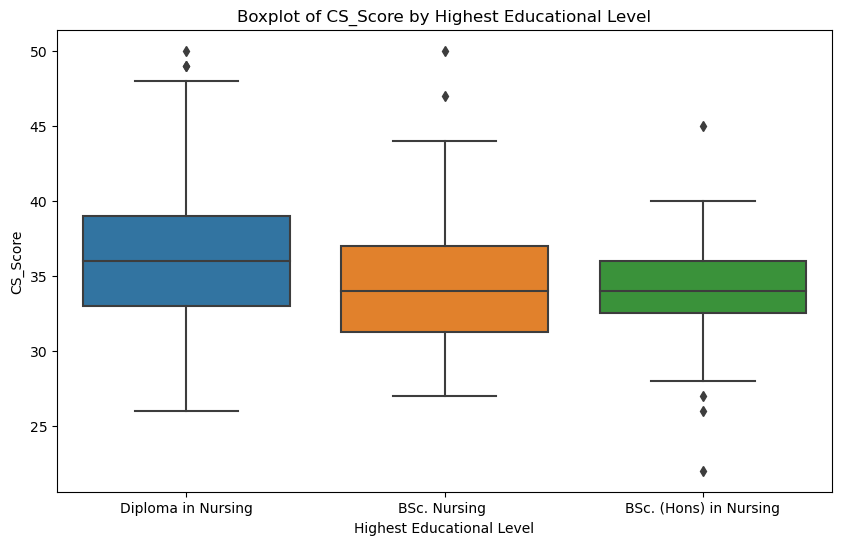

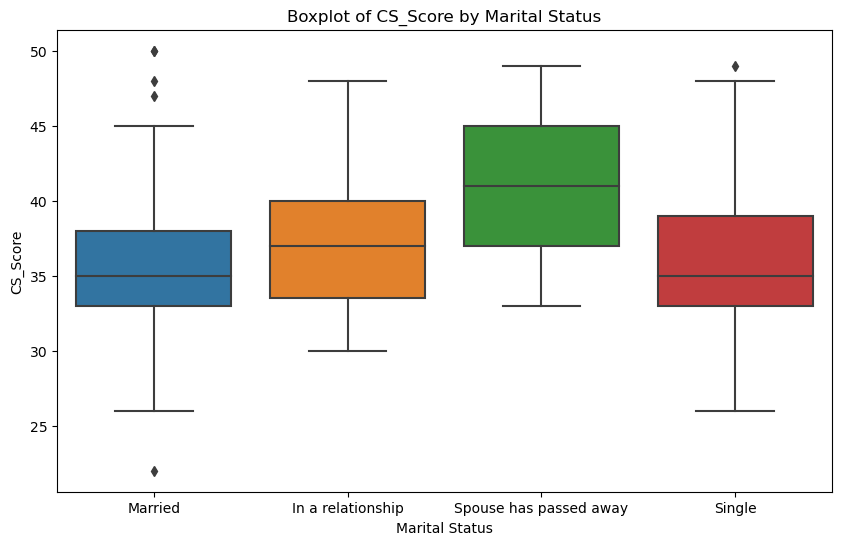

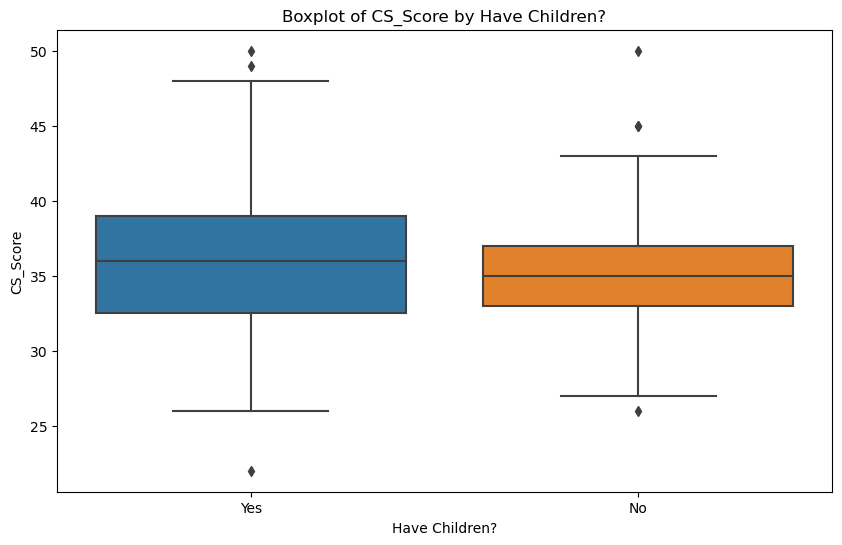

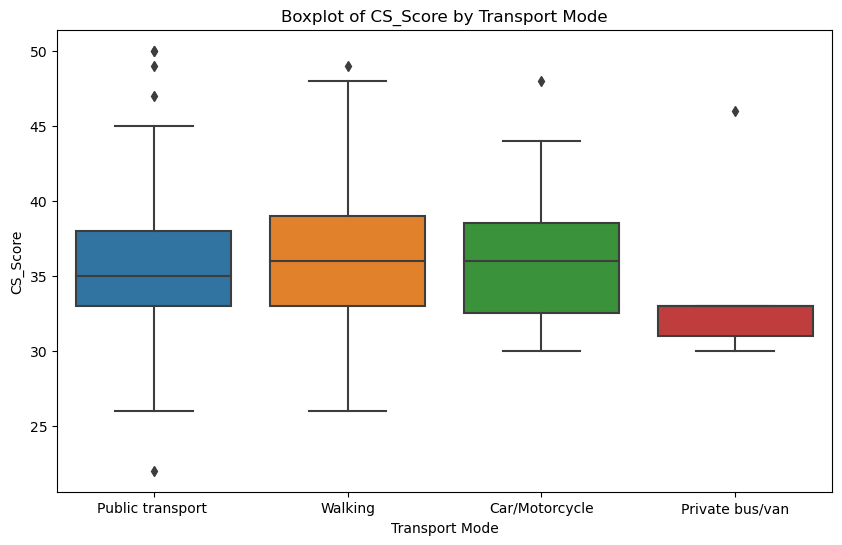

In [8]:
# CS with Nominal variables

nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity','Gender','Highest Educational Level','Marital Status','Have Children?','Transport Mode']

# Loop through nominal variables and create boxplots
for nominal_var in nominal_variables:
    plt.figure(figsize=(10, 6))
    
    # Exclude 'Not relevant' category for 'Have Children?' variable
    if nominal_var == 'Have Children?':
        sns.boxplot(x=nominal_var, y='CS_Score', data=df[df[nominal_var] != 'Not relevant'])
    else:
        sns.boxplot(x=nominal_var, y='CS_Score', data=df)
    
    plt.title(f'Boxplot of CS_Score by {nominal_var}')
    plt.show()

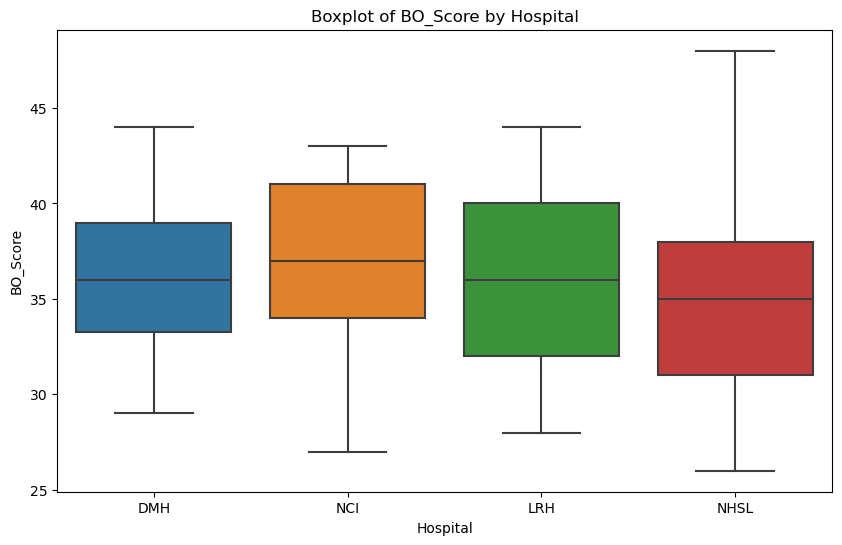

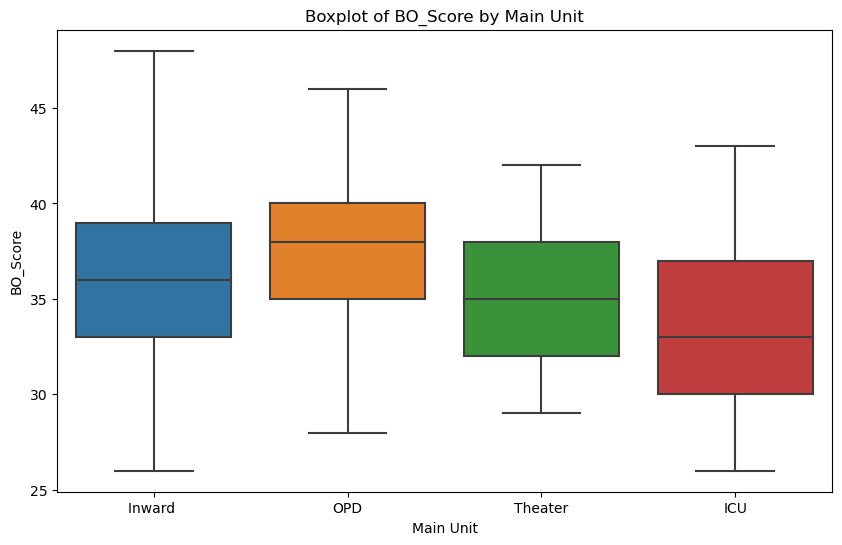

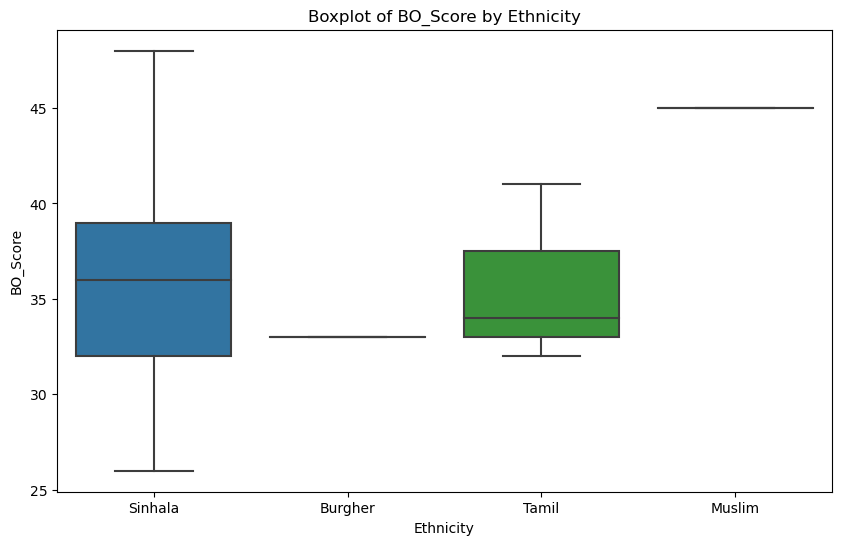

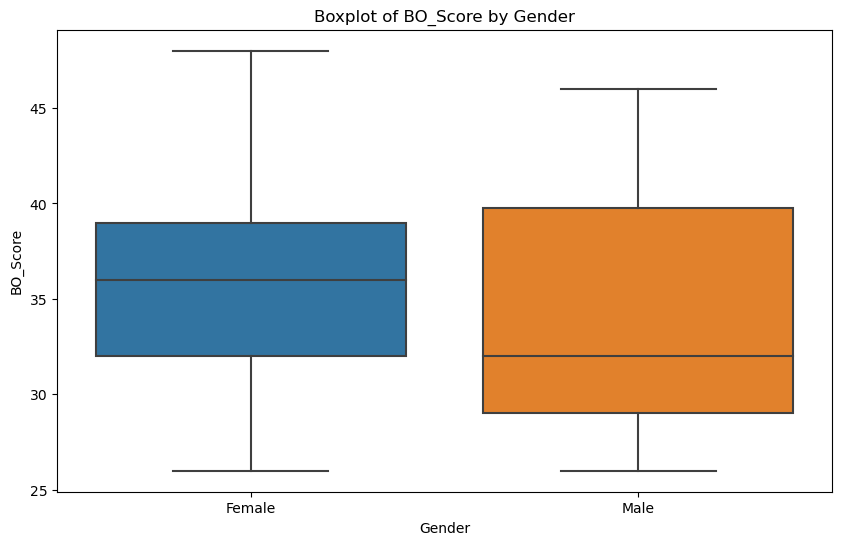

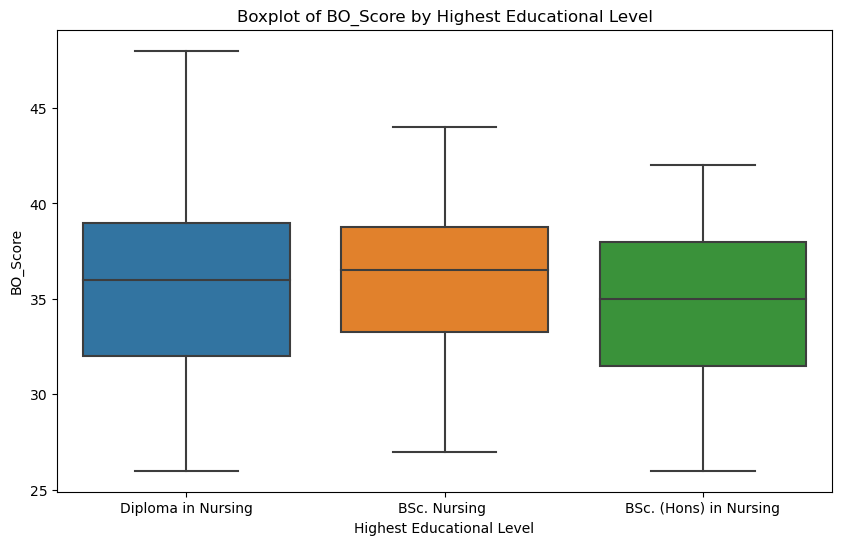

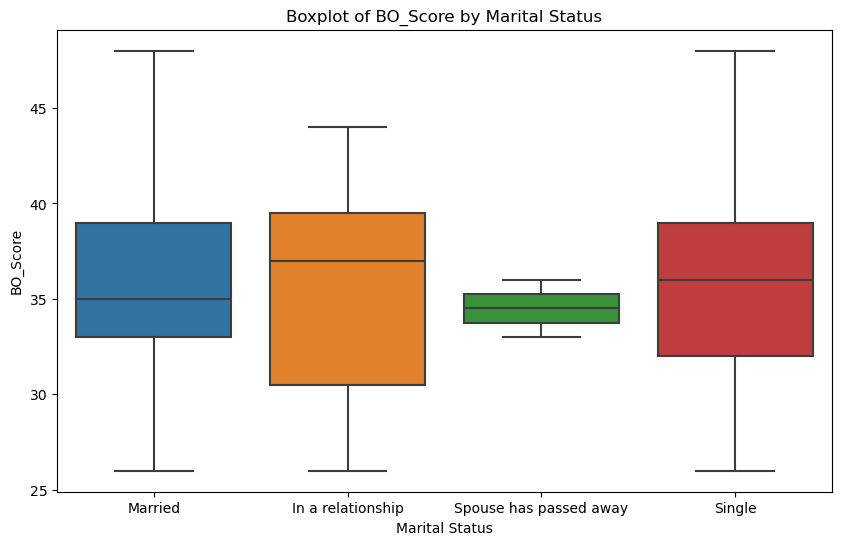

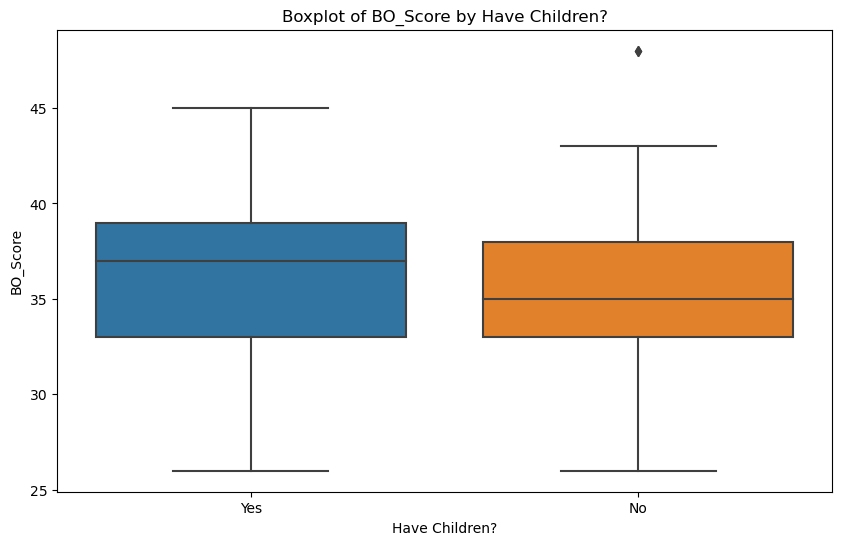

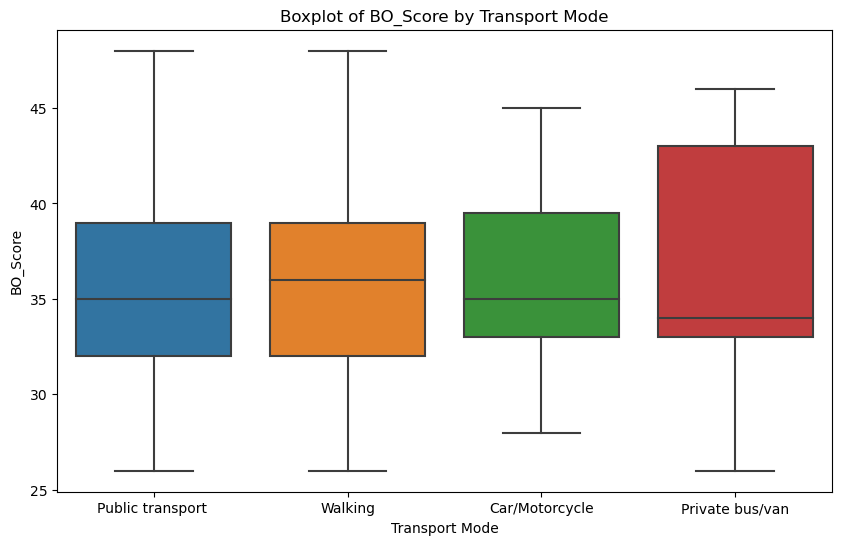

In [9]:
# BO with nominal variables

nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity','Gender','Highest Educational Level','Marital Status','Have Children?','Transport Mode']

# Loop through nominal variables and create boxplots
for nominal_var in nominal_variables:
    plt.figure(figsize=(10, 6))
    
    # Exclude 'Not relevant' category for 'Have Children?' variable
    if nominal_var == 'Have Children?':
        sns.boxplot(x=nominal_var, y='BO_Score', data=df[df[nominal_var] != 'Not relevant'])
    else:
        sns.boxplot(x=nominal_var, y='BO_Score', data=df)
    
    plt.title(f'Boxplot of BO_Score by {nominal_var}')
    plt.show()

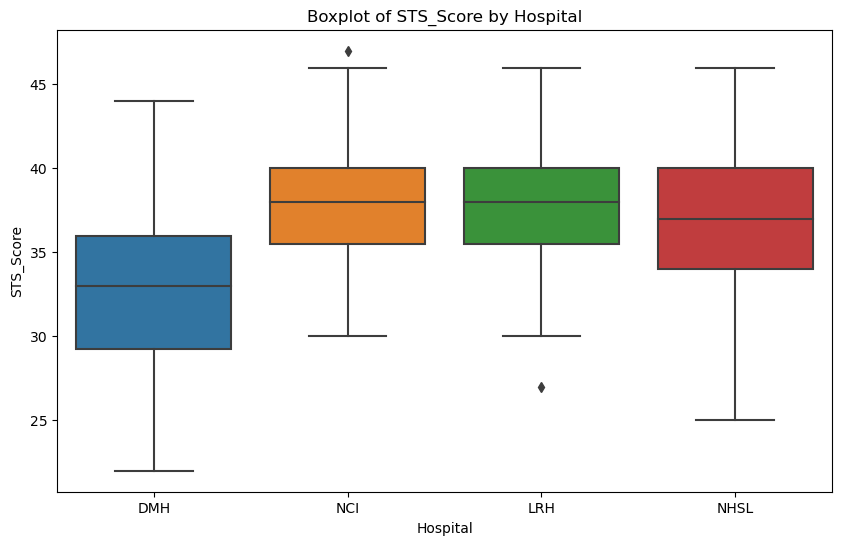

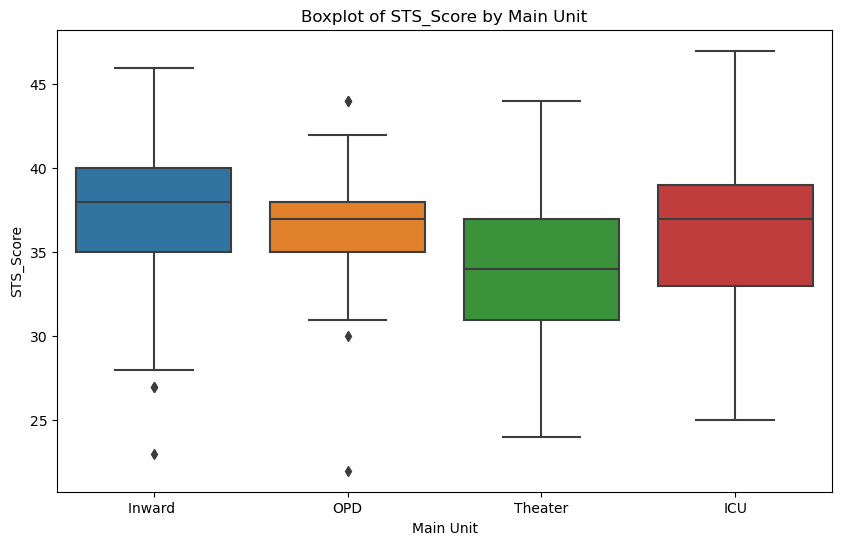

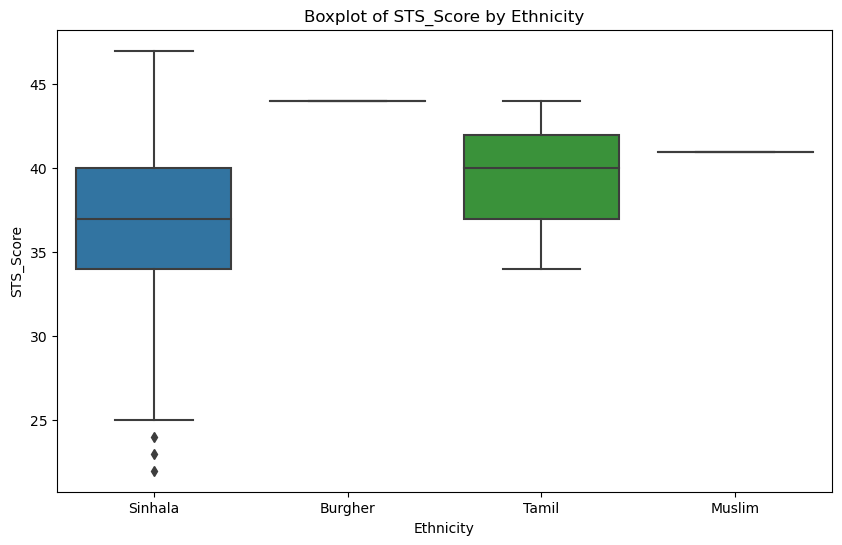

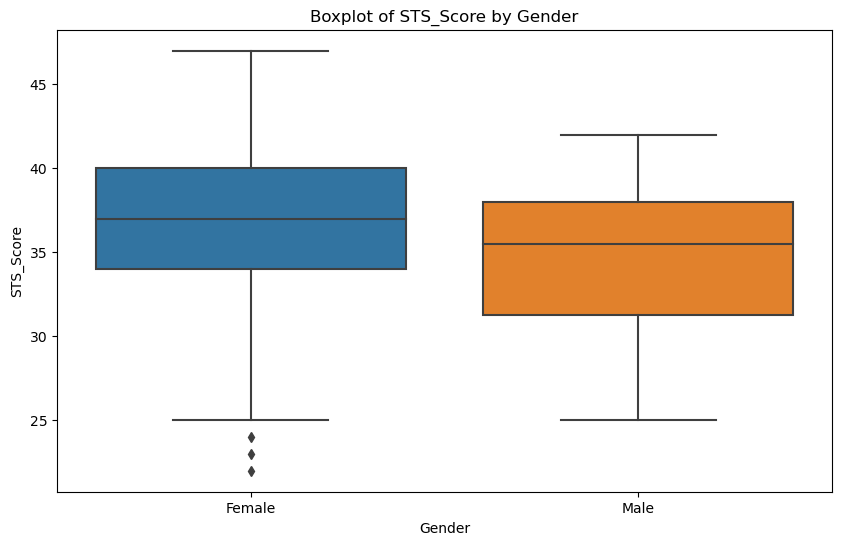

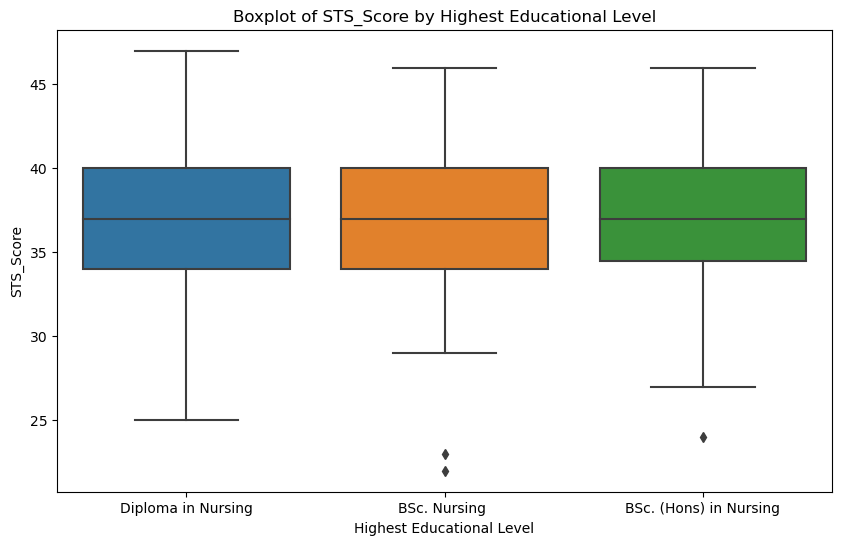

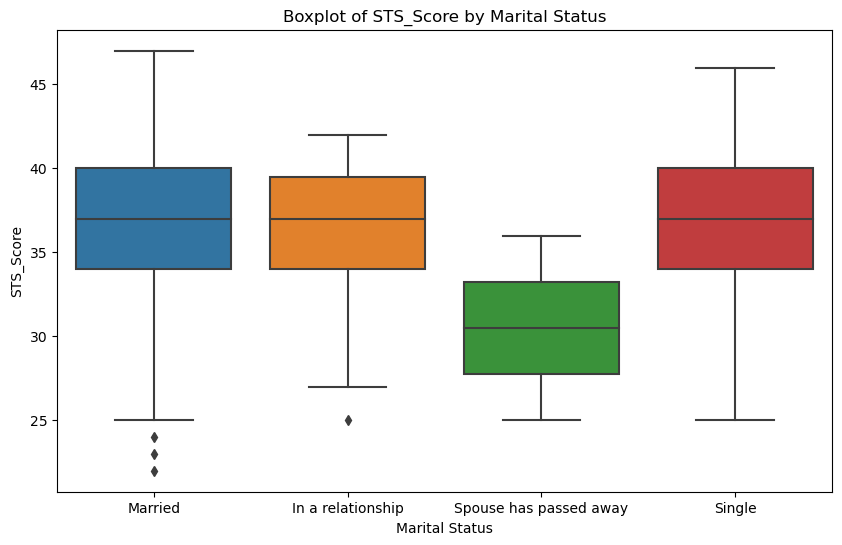

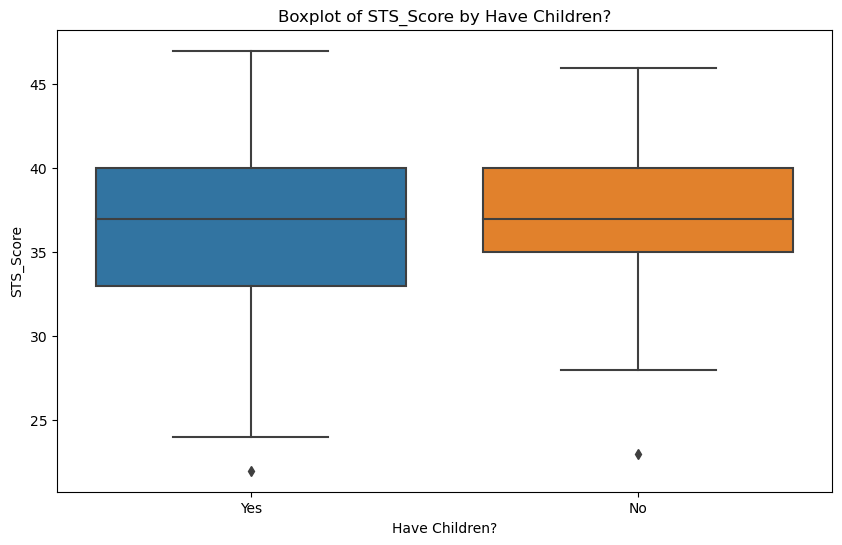

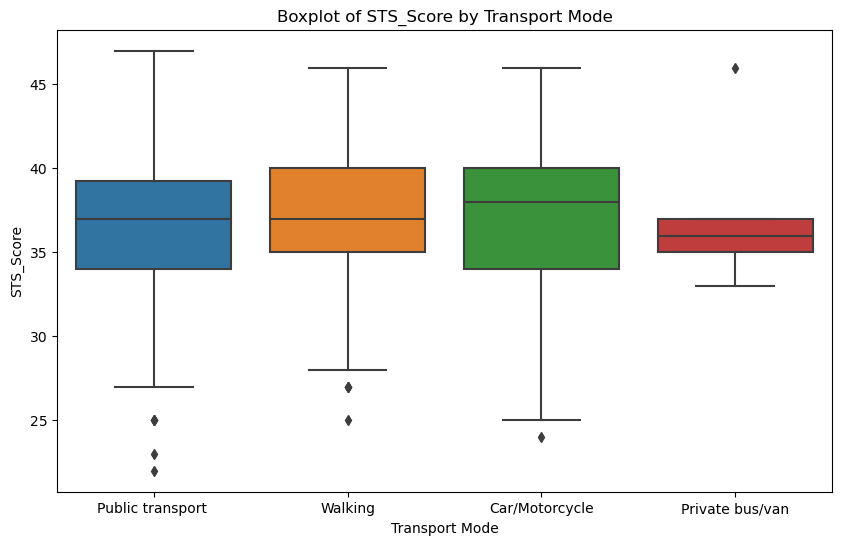

In [10]:
# STS with nominal variables

nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity','Gender','Highest Educational Level','Marital Status','Have Children?','Transport Mode']

# Loop through nominal variables and create boxplots
for nominal_var in nominal_variables:
    plt.figure(figsize=(10, 6))
    
    # Exclude 'Not relevant' category for 'Have Children?' variable
    if nominal_var == 'Have Children?':
        sns.boxplot(x=nominal_var, y='STS_Score', data=df[df[nominal_var] != 'Not relevant'])
    else:
        sns.boxplot(x=nominal_var, y='STS_Score', data=df)
    
    plt.title(f'Boxplot of STS_Score by {nominal_var}')
    plt.show()

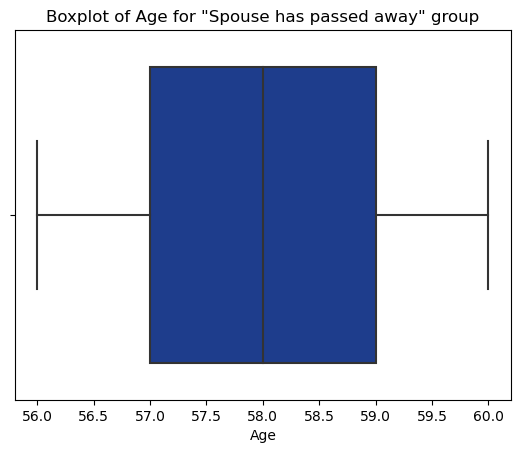

In [11]:
# Filter the DataFrame for "Spouse has passed away" level in "Marital status"
filtered_df = df[df['Marital Status'] == 'Spouse has passed away']

custom_palette = {'#0C359E'}

# Create the boxplot
sns.boxplot(x=filtered_df['Age'], palette=custom_palette)

# Set the title
plt.title('Boxplot of Age for "Spouse has passed away" group')

# Show the plot
plt.show()

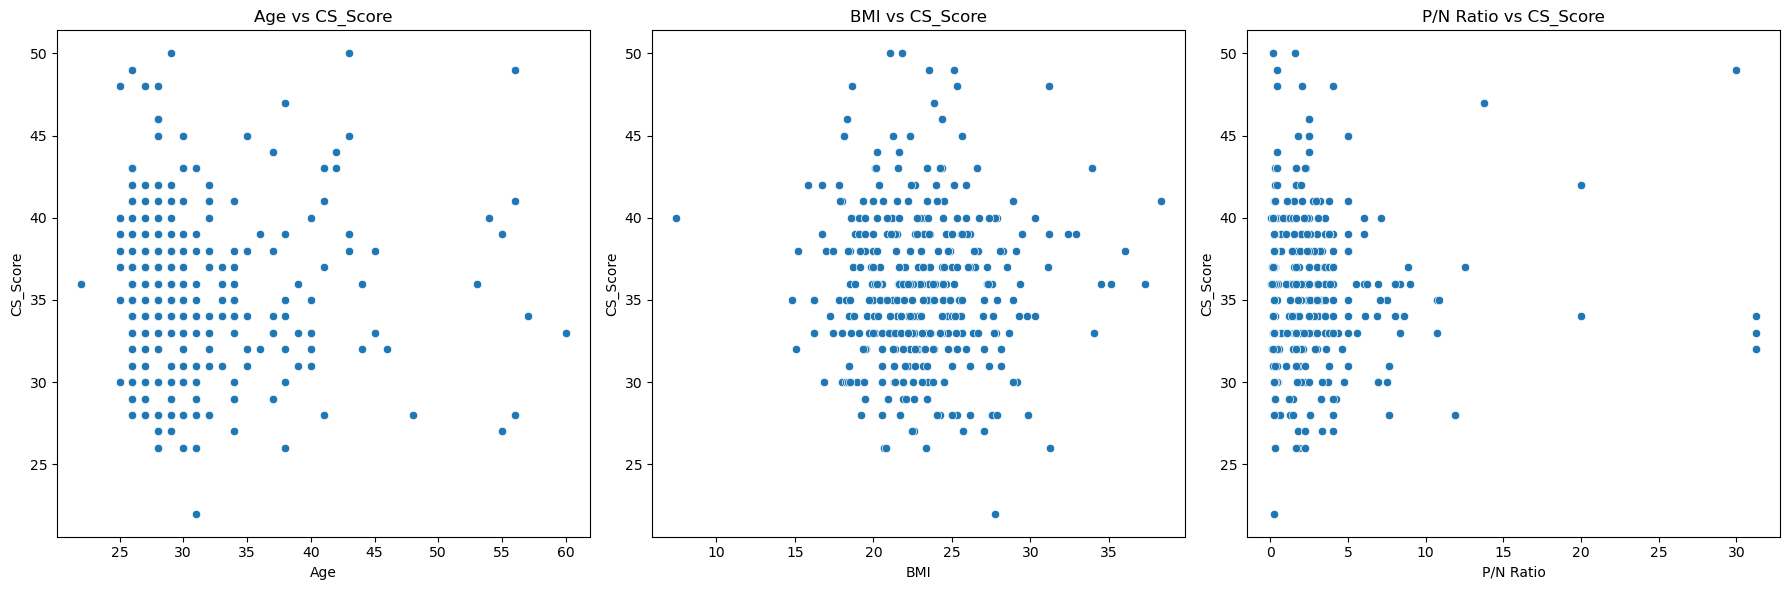

In [12]:
# CS with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for Age vs CS_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='CS_Score', data=df)
plt.title('Age vs CS_Score')

# Scatter plot for BMI vs CS_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='CS_Score', data=df)
plt.title('BMI vs CS_Score')

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='CS_Score', data=df)
plt.title('P/N Ratio vs CS_Score')

plt.tight_layout()
plt.show()

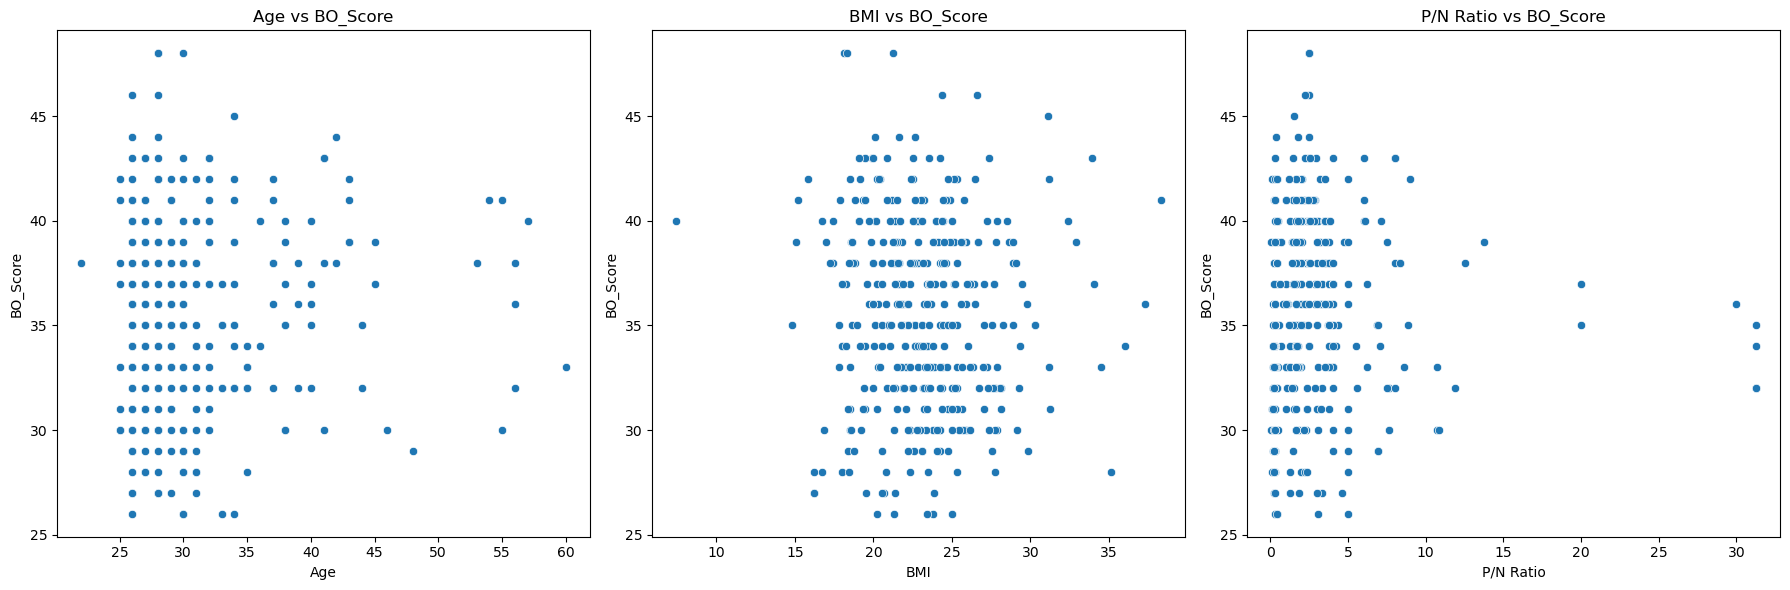

In [13]:
# BO with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for Age vs CS_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='BO_Score', data=df)
plt.title('Age vs BO_Score')

# Scatter plot for BMI vs CS_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='BO_Score', data=df)
plt.title('BMI vs BO_Score')

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='BO_Score', data=df)
plt.title('P/N Ratio vs BO_Score')

plt.tight_layout()
plt.show()

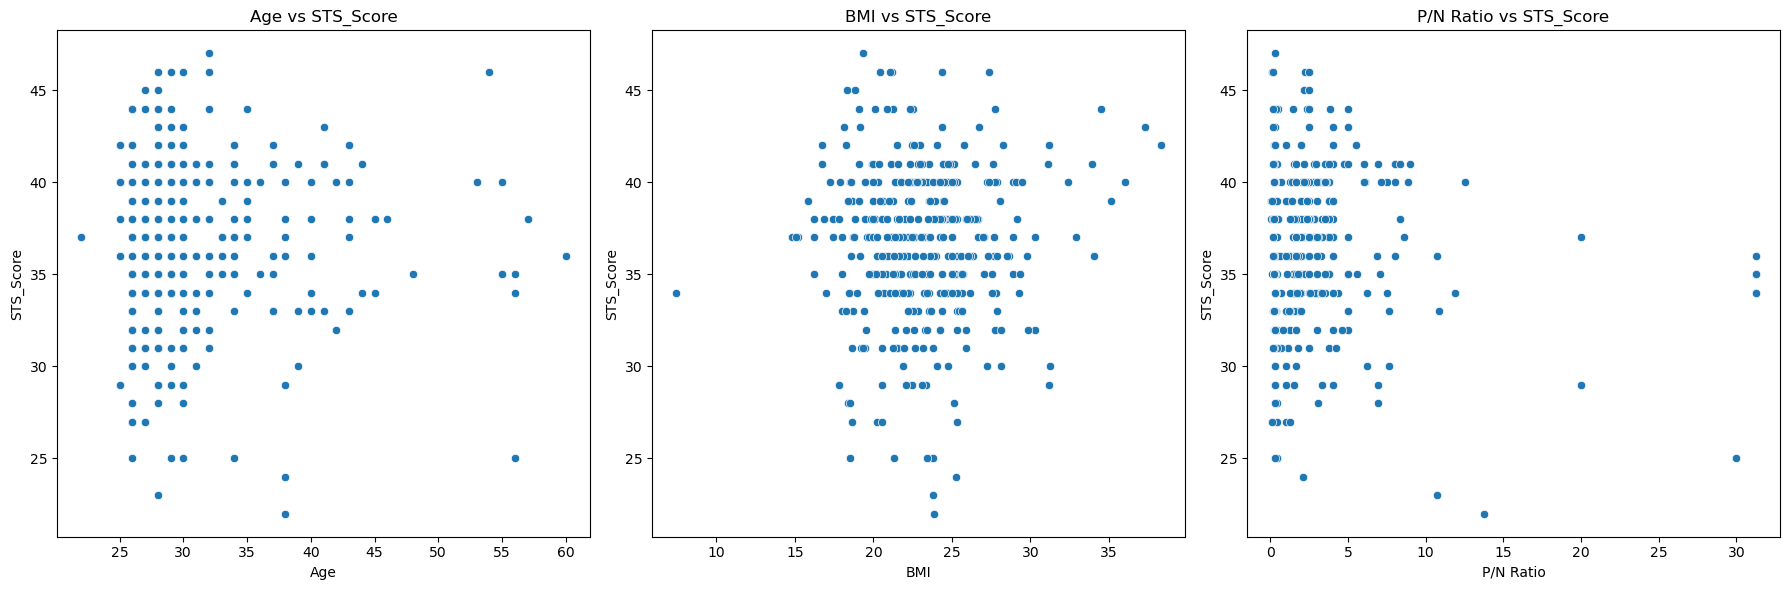

In [14]:
# STS with numeric variables (Age, BMI, P/N ratio)

# Scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for Age vs CS_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='STS_Score', data=df)
plt.title('Age vs STS_Score')

# Scatter plot for BMI vs CS_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='STS_Score', data=df)
plt.title('BMI vs STS_Score')

# Scatter plot for P/N Ratio vs CS_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='P/N Ratio', y='STS_Score', data=df)
plt.title('P/N Ratio vs STS_Score')

plt.tight_layout()
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


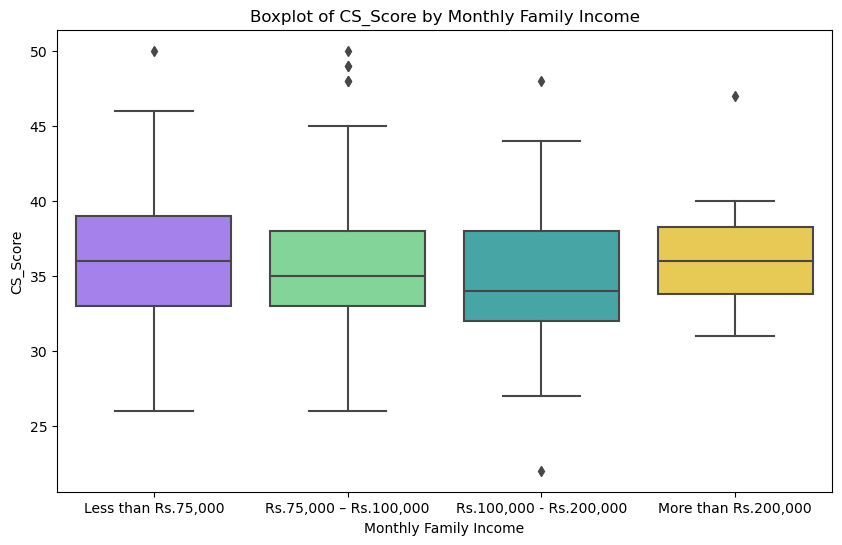

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


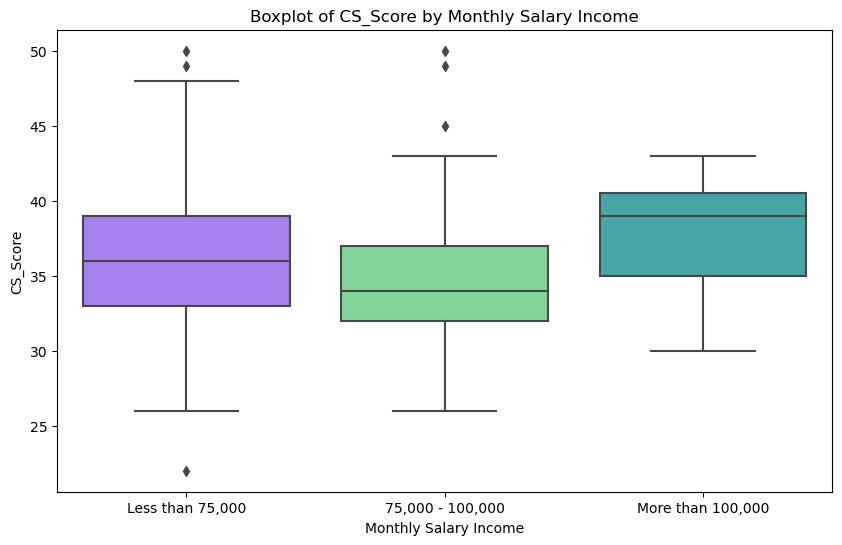

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


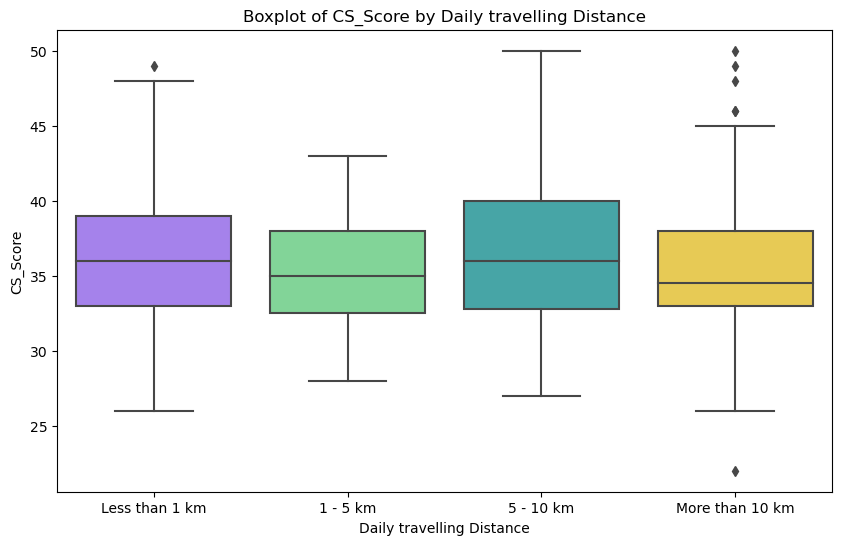

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


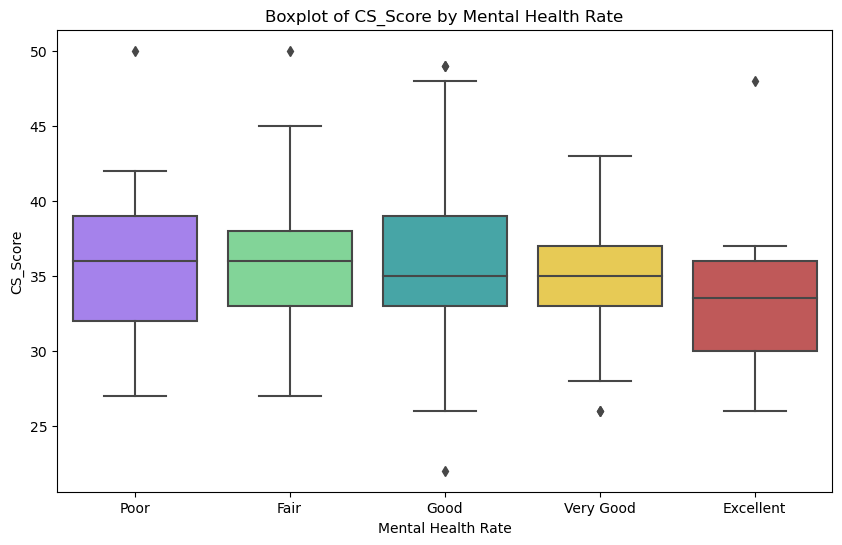

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


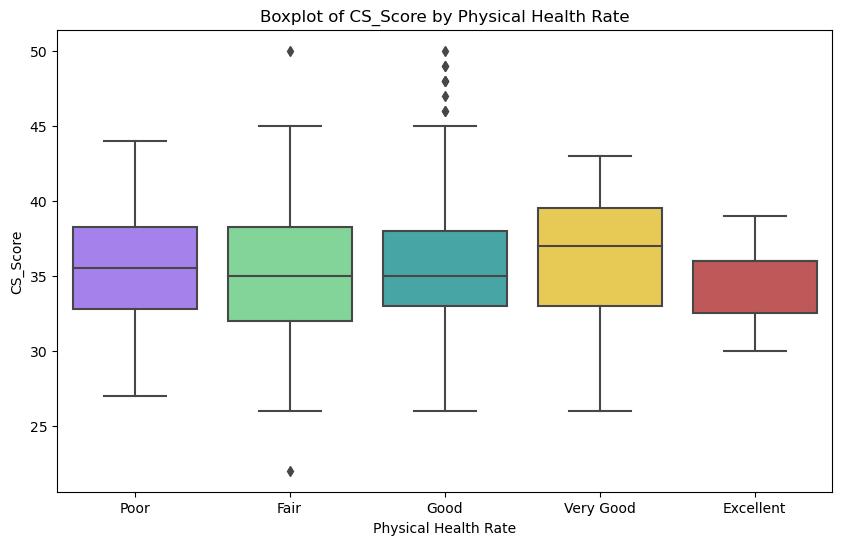

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


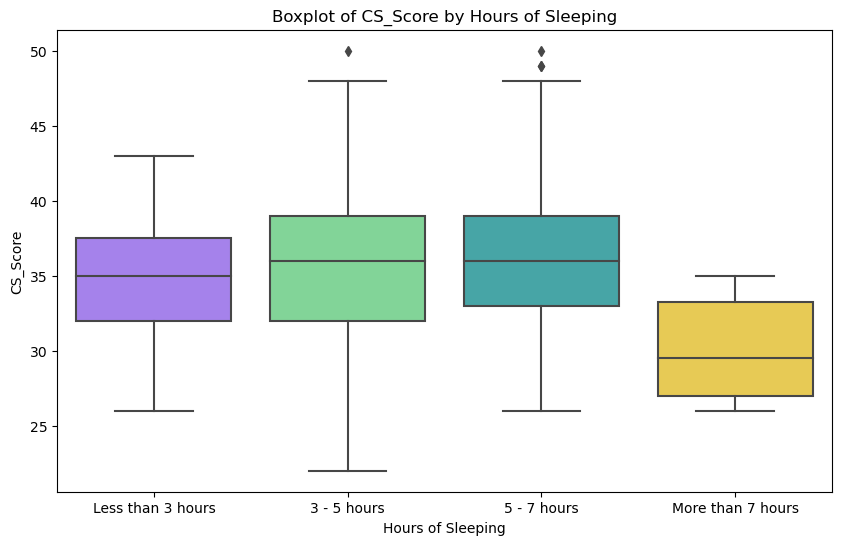

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


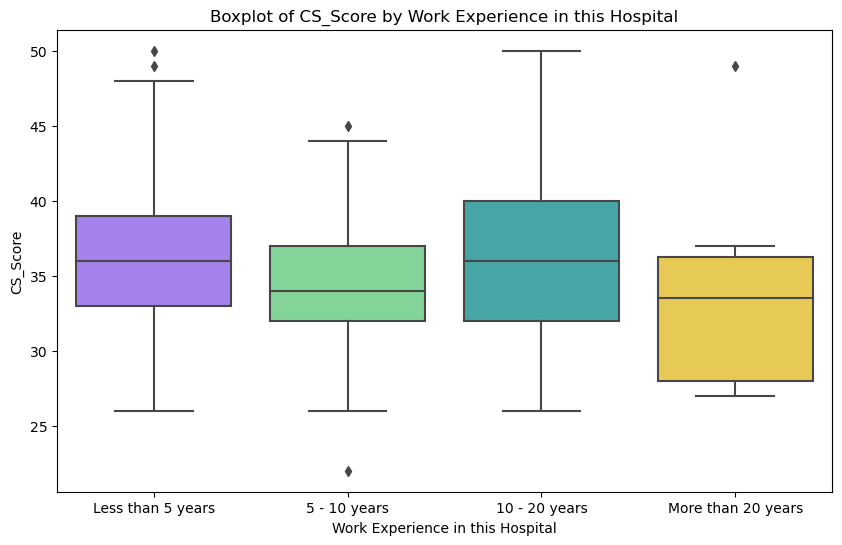

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


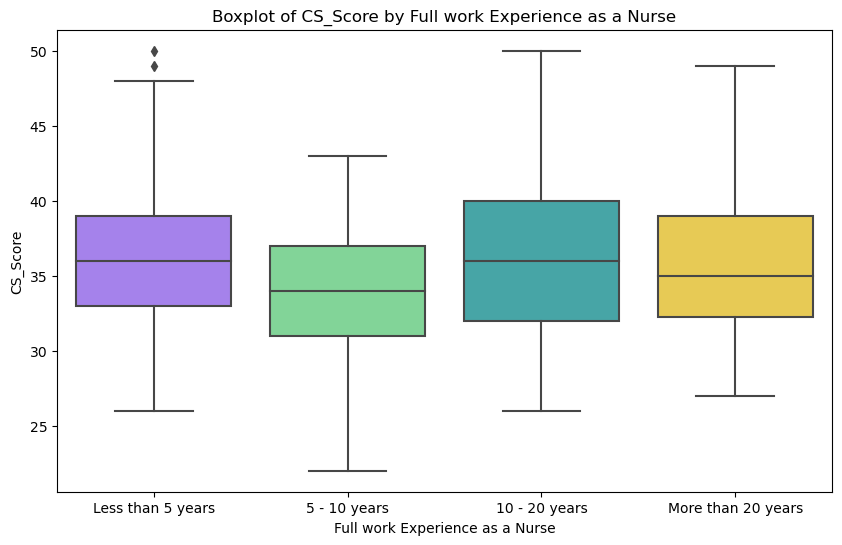

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


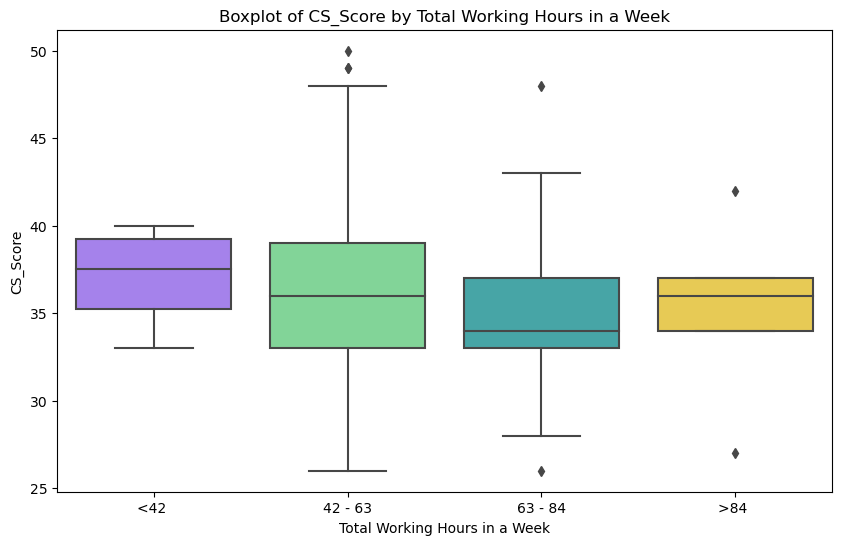

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


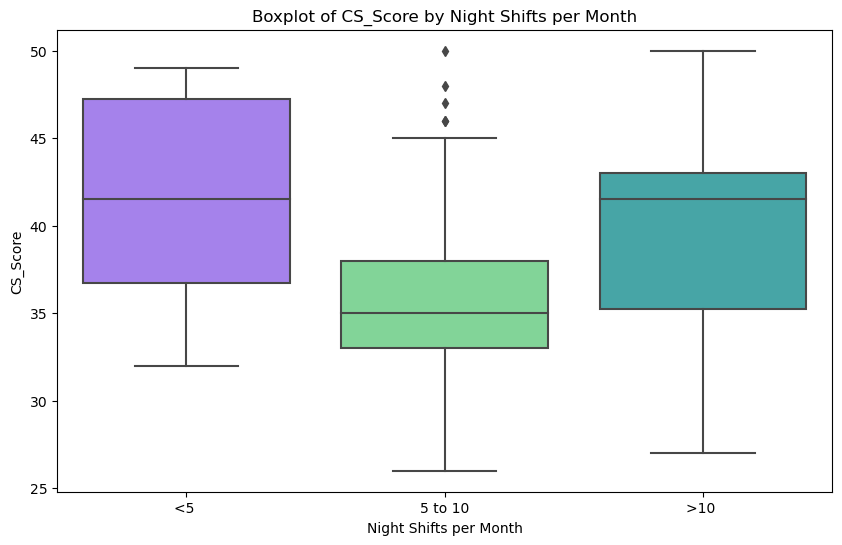

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


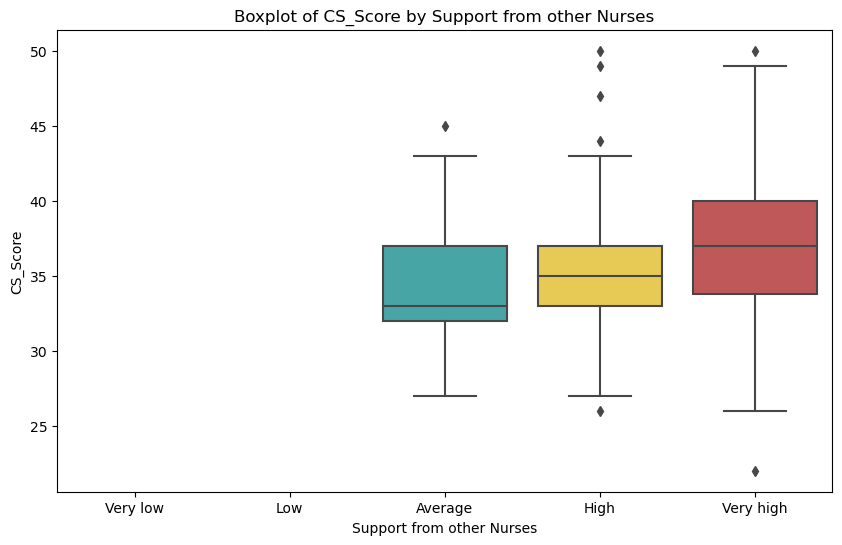

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


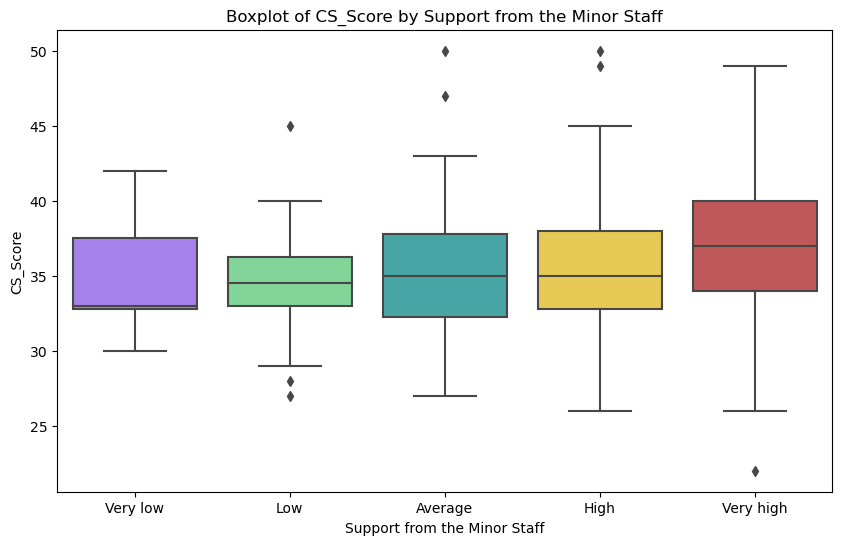

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


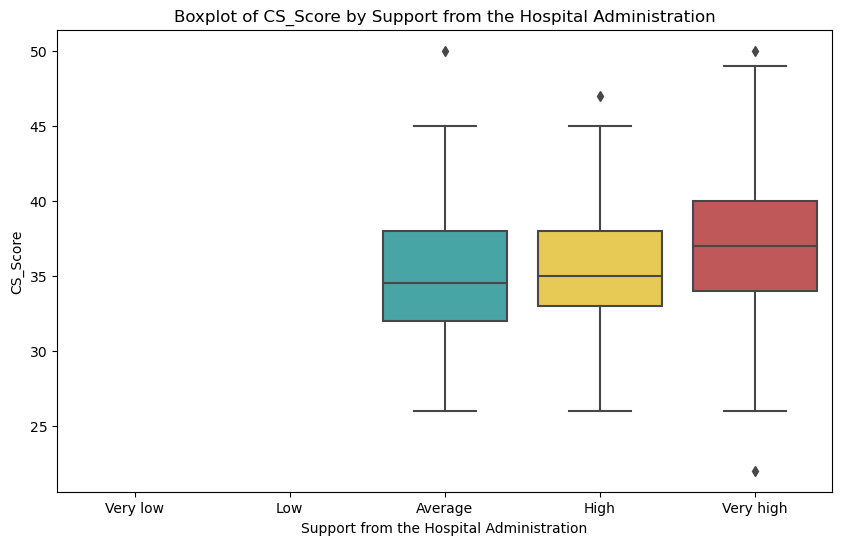

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


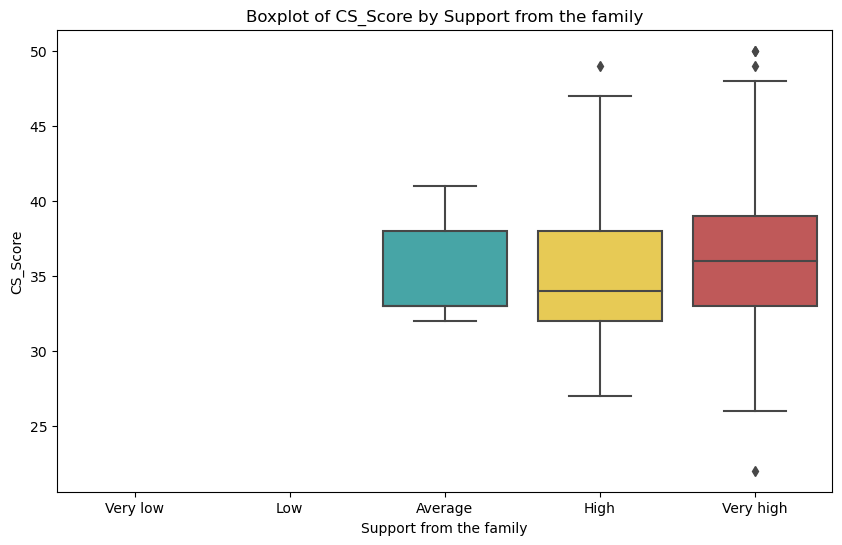

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


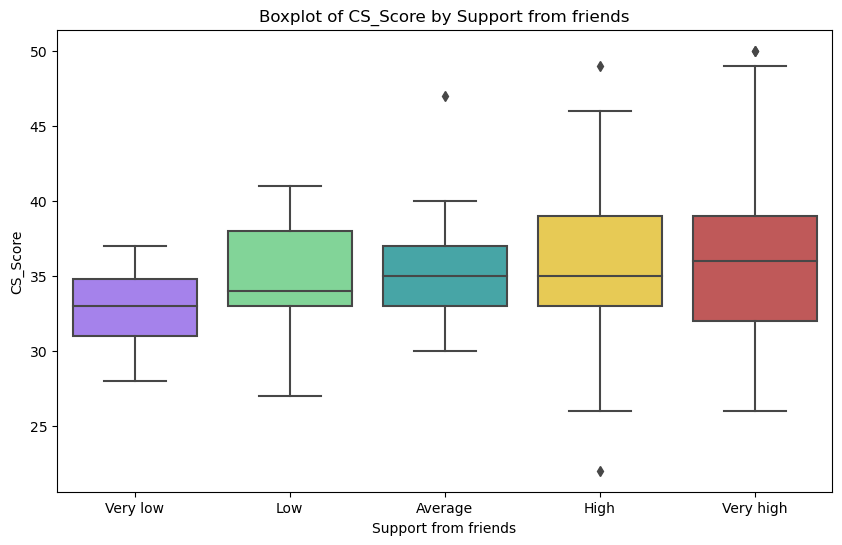

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


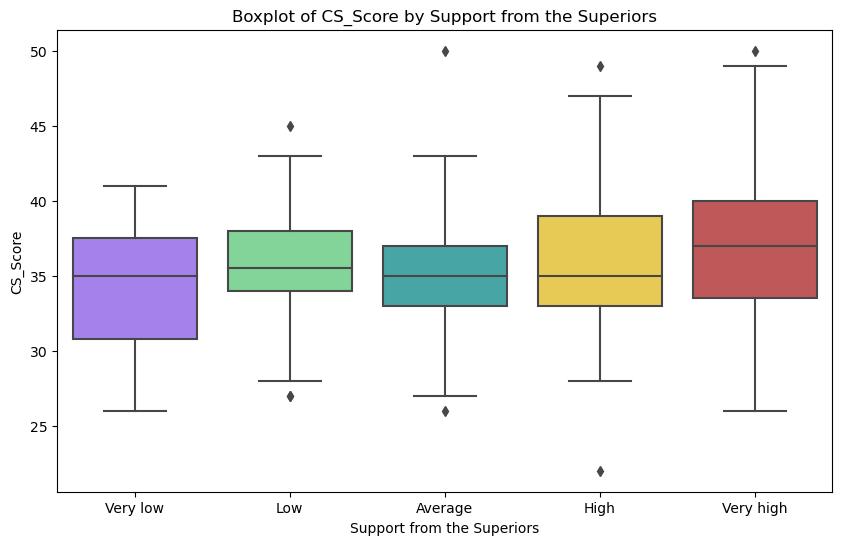

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


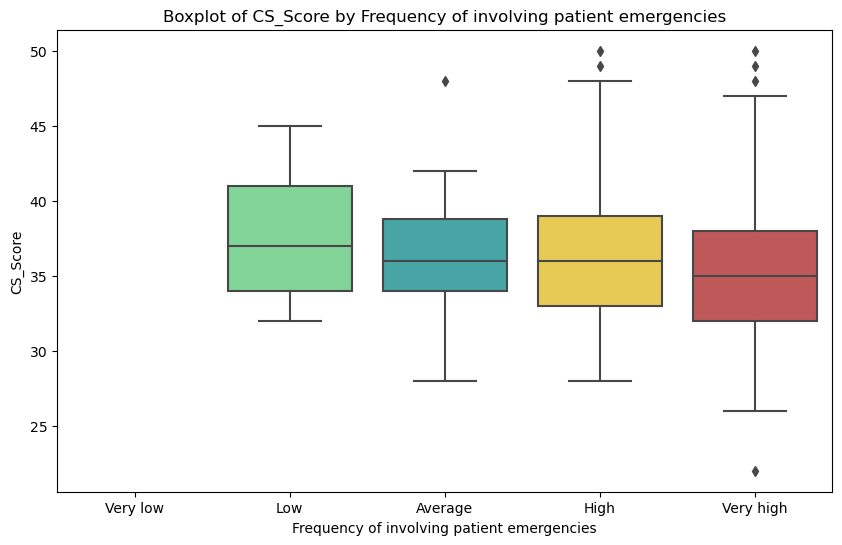

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


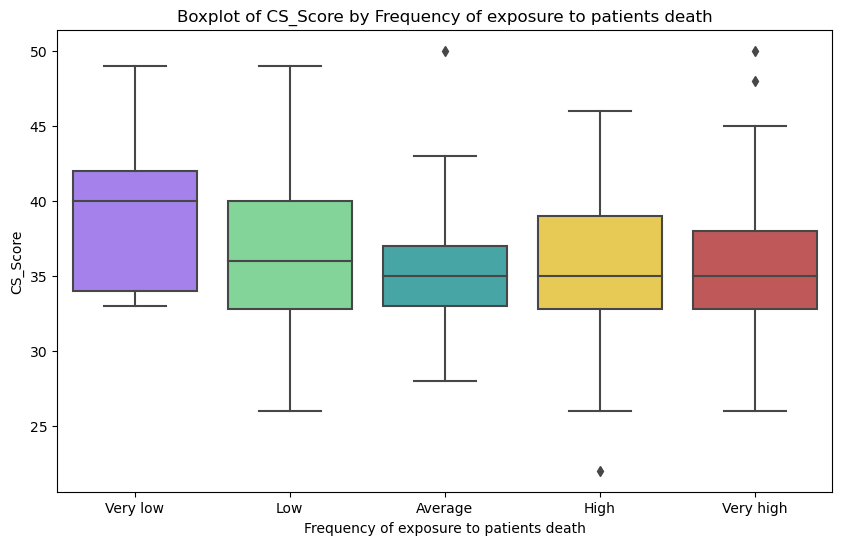

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


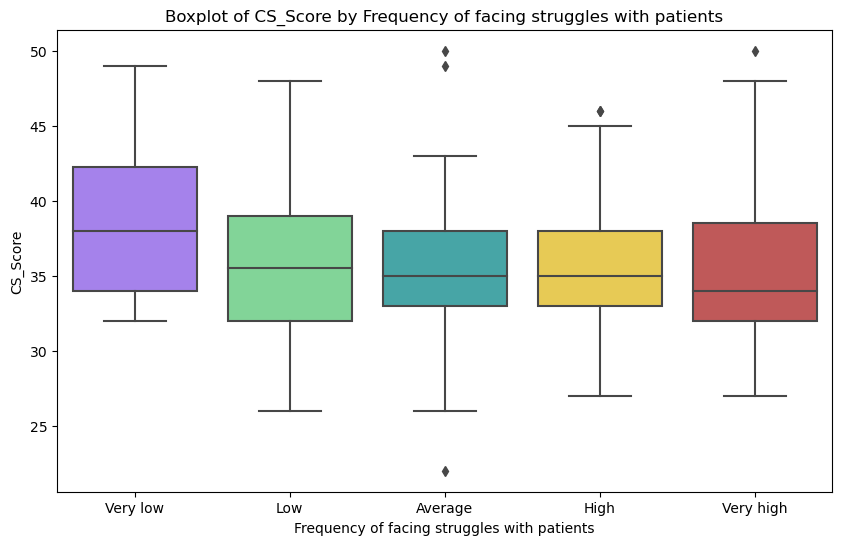

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


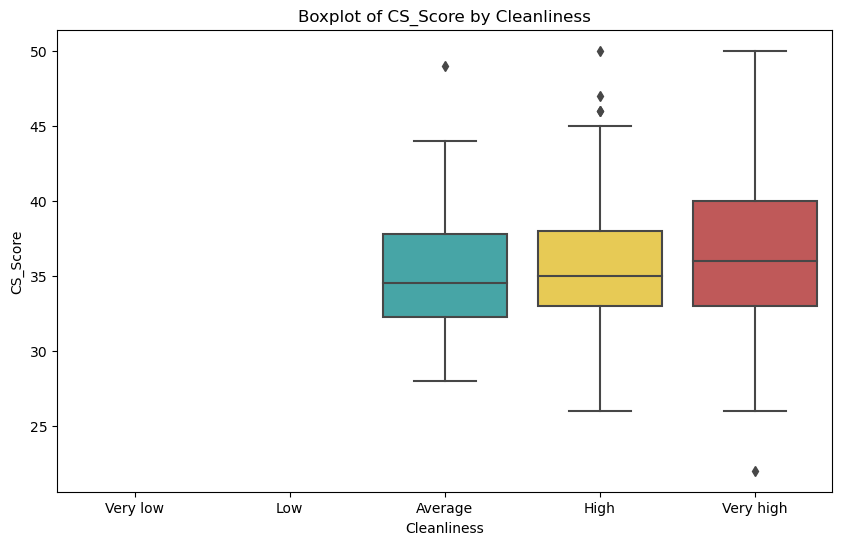

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


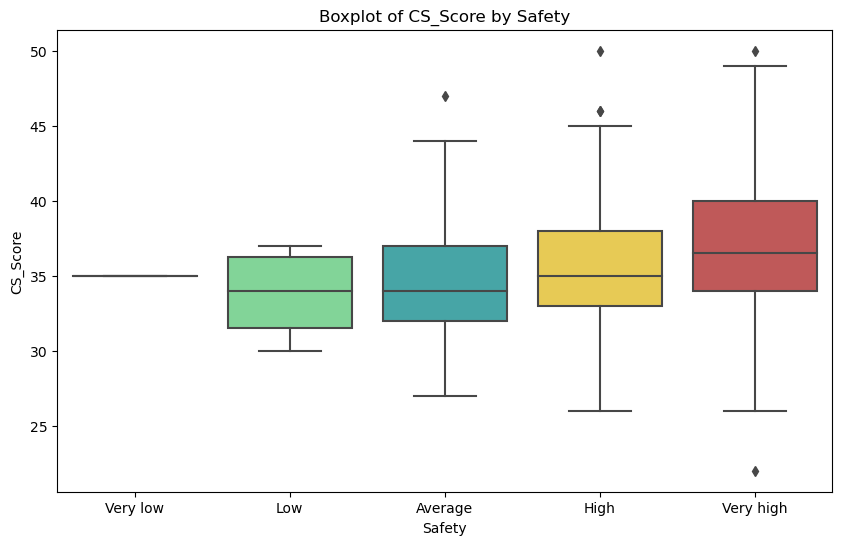

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


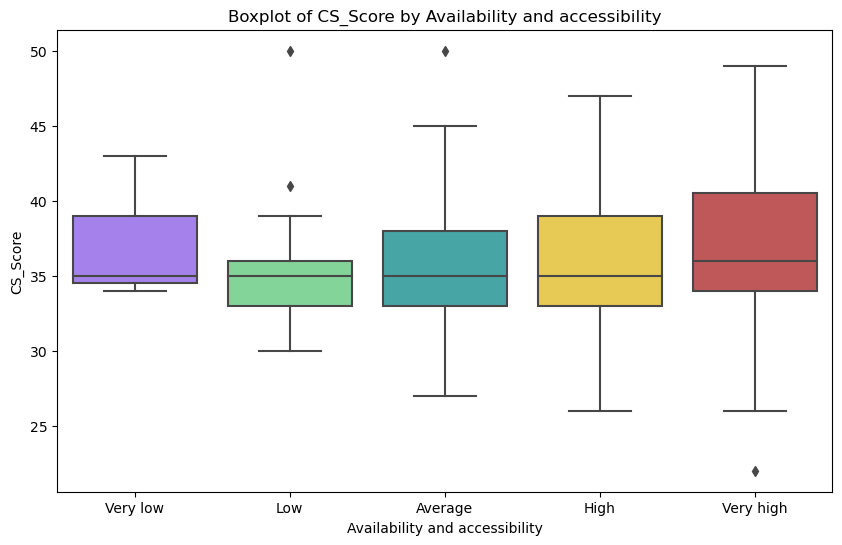

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


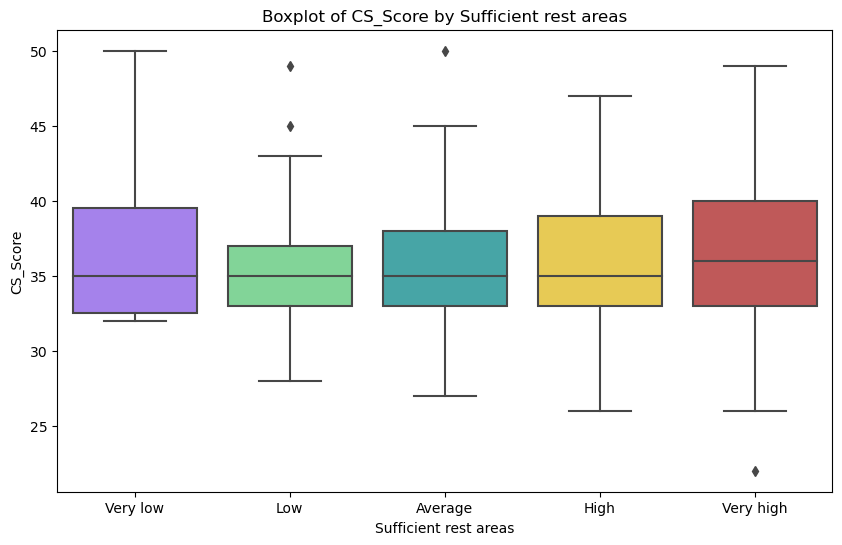

In [15]:
ordinal_variables = ['Monthly Family Income','Monthly Salary Income', 'Daily travelling Distance', 'Mental Health Rate','Physical Health Rate','Hours of Sleeping','Work Experience in this Hospital','Full work Experience as a Nurse','Total Working Hours in a Week','Night Shifts per Month','Support from other Nurses','Support from the Minor Staff','Support from the Hospital Administration','Support from the family','Support from friends','Support from the Superiors','Frequency of involving patient emergencies','Frequency of exposure to patients death','Frequency of facing struggles with patients','Cleanliness','Safety','Availability and accessibility','Sufficient rest areas']

ordinal_variables_order = {
    'Monthly Family Income': ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 - Rs.200,000','More than Rs.200,000'],
    'Monthly Salary Income': ['Less than 75,000', '75,000 - 100,000', 'More than 100,000'],
    'Daily travelling Distance': ['Less than 1 km', '1 - 5 km', '5 - 10 km','More than 10 km'],
    'Mental Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Physical Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Hours of Sleeping': ['Less than 3 hours','3 - 5 hours','5 - 7 hours','More than 7 hours'],
    'Work Experience in this Hospital': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Full work Experience as a Nurse': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Total Working Hours in a Week': ['<42 ','42 - 63','63 - 84','>84 '],
    'Night Shifts per Month': ['<5 ','5 to 10','>10 '],
    'Relationship with the Superiors': ['Very low','Low','Average','High','Very high'],
    'Support from other Nurses': ['Very low','Low','Average','High','Very high'],
    'Support from the Minor Staff': ['Very low','Low','Average','High','Very high'],
    'Support from the Hospital Administration': ['Very low','Low','Average','High','Very high'],
    'Support from the family': ['Very low','Low','Average','High','Very high'],
    'Support from friends': ['Very low','Low','Average','High','Very high'],
    'Support from the Superiors': ['Very low','Low','Average','High','Very high'],
    'Frequency of involving patient emergencies': ['Very low','Low','Average','High','Very high'],
    'Frequency of exposure to patients death': ['Very low','Low','Average','High','Very high'],
    'Frequency of facing struggles with patients': ['Very low','Low','Average','High','Very high'],
    'Cleanliness': ['Very low','Low','Average','High','Very high'],
    'Safety': ['Very low','Low','Average','High','Very high'],
    'Availability and accessibility': ['Very low','Low','Average','High','Very high'],
    'Sufficient rest areas': ['Very low','Low','Average','High','Very high']
}

# Convert ordinal variables to categorical with custom order
for ordinal_var, custom_order in ordinal_variables_order.items():
    df[ordinal_var] = pd.Categorical(df[ordinal_var], categories=custom_order, ordered=True)

custom_palette = {'#D04848', '#37B5B6', '#74E291', '#9F70FD', '#FFD93D'}

for ordinal_var in ordinal_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=ordinal_var, y='CS_Score', data=df, palette=custom_palette)
    plt.title(f'Boxplot of CS_Score by {ordinal_var}')
    plt.show()

## Boxplots of Score distributions w.r.t. each category of nominal variables

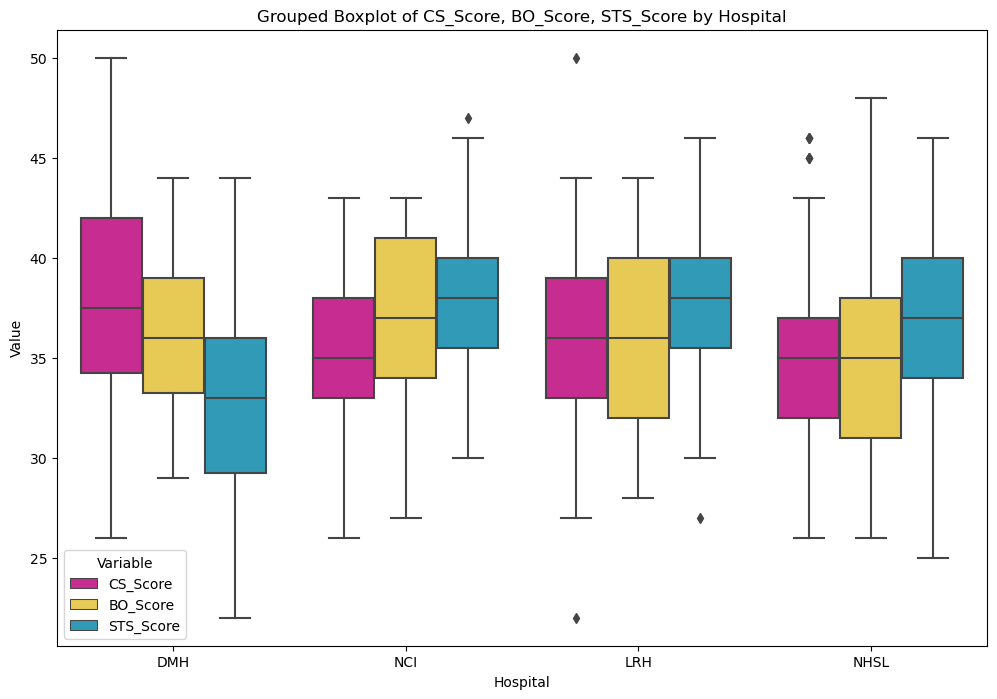

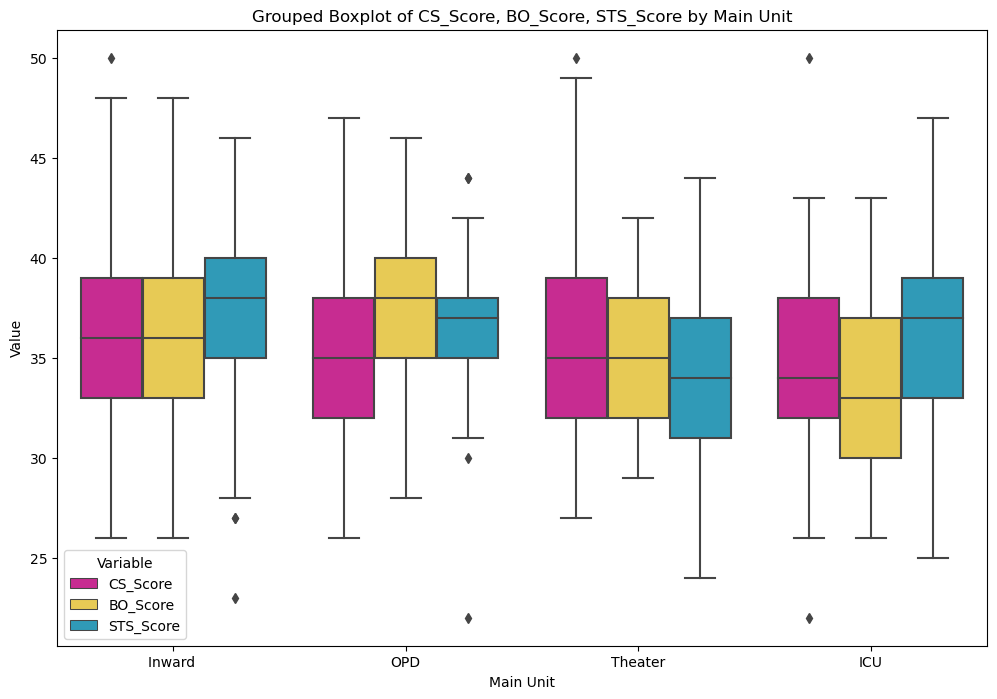

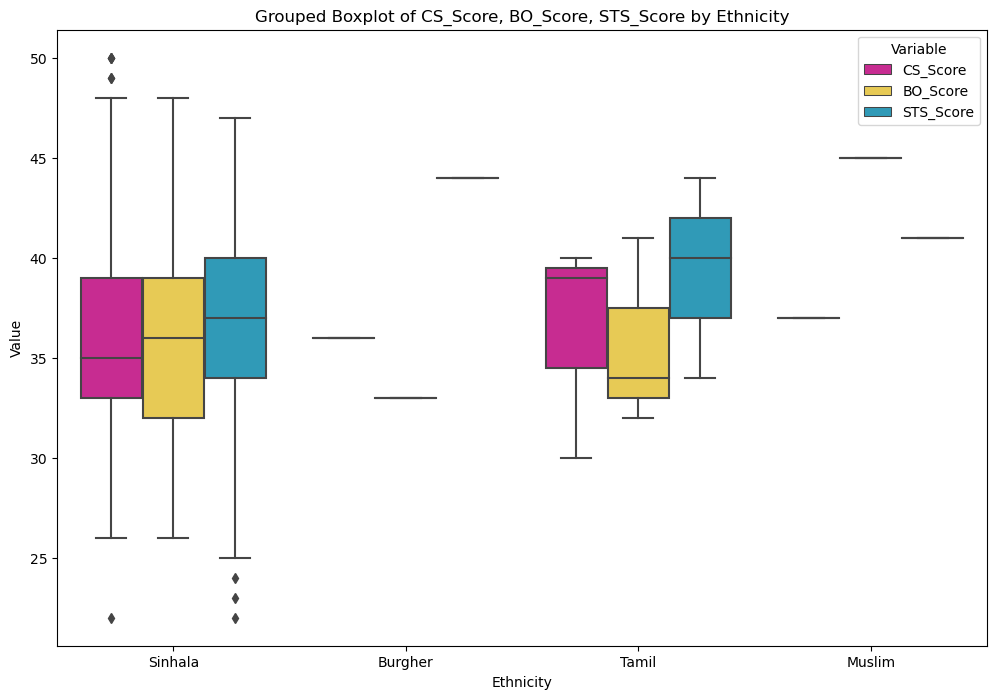

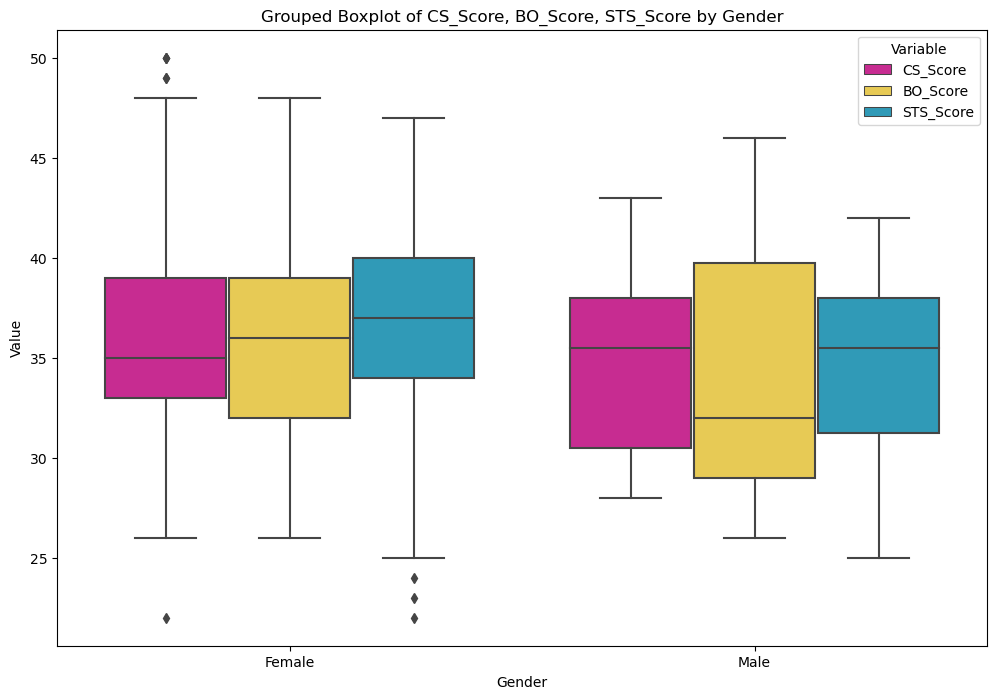

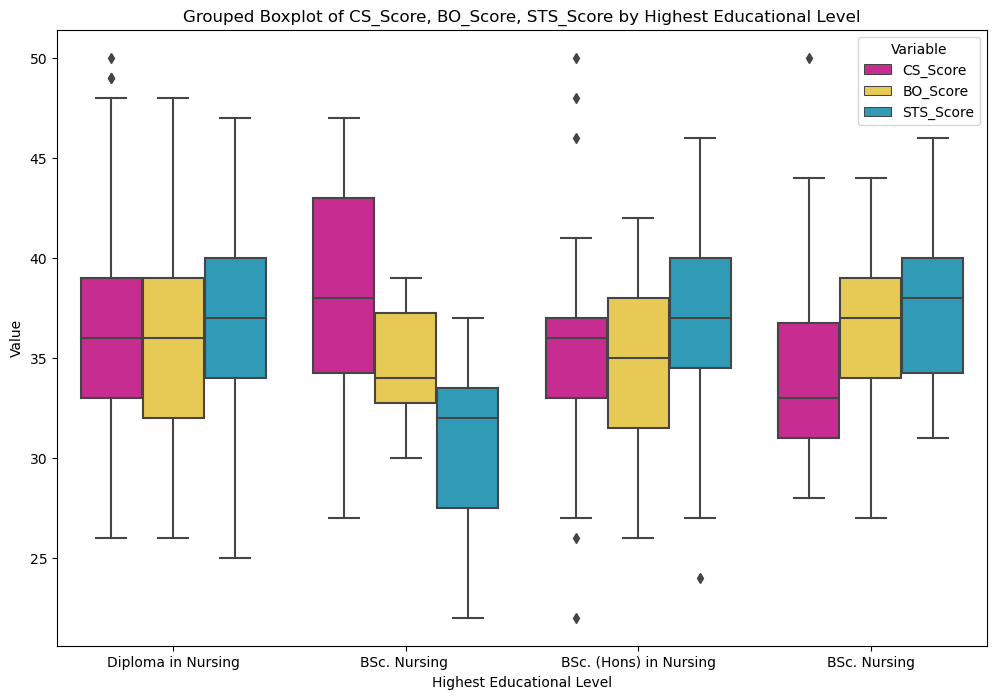

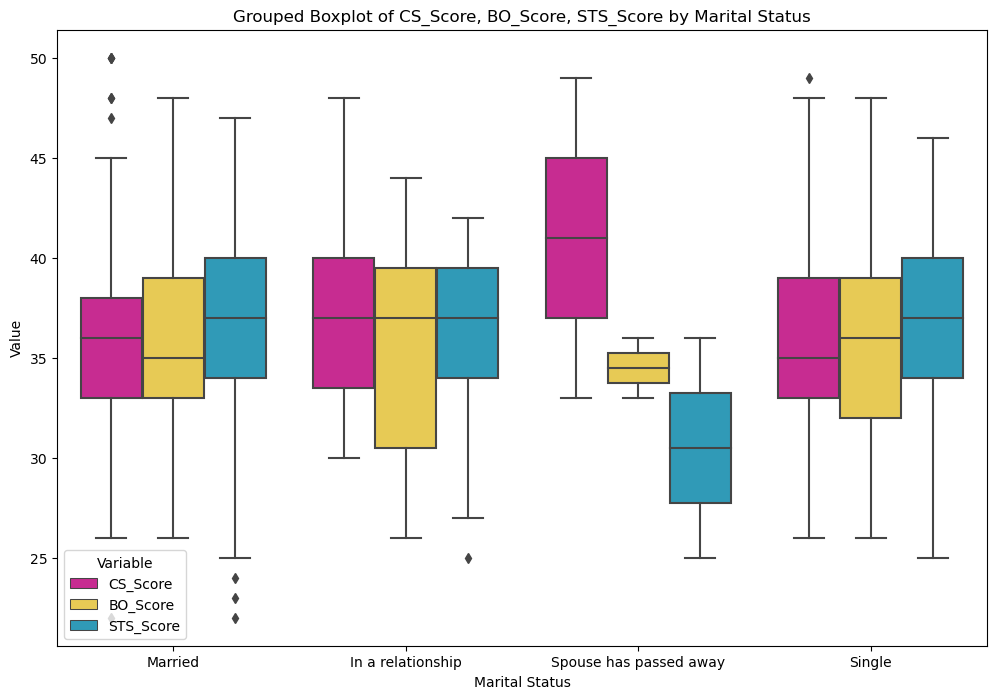

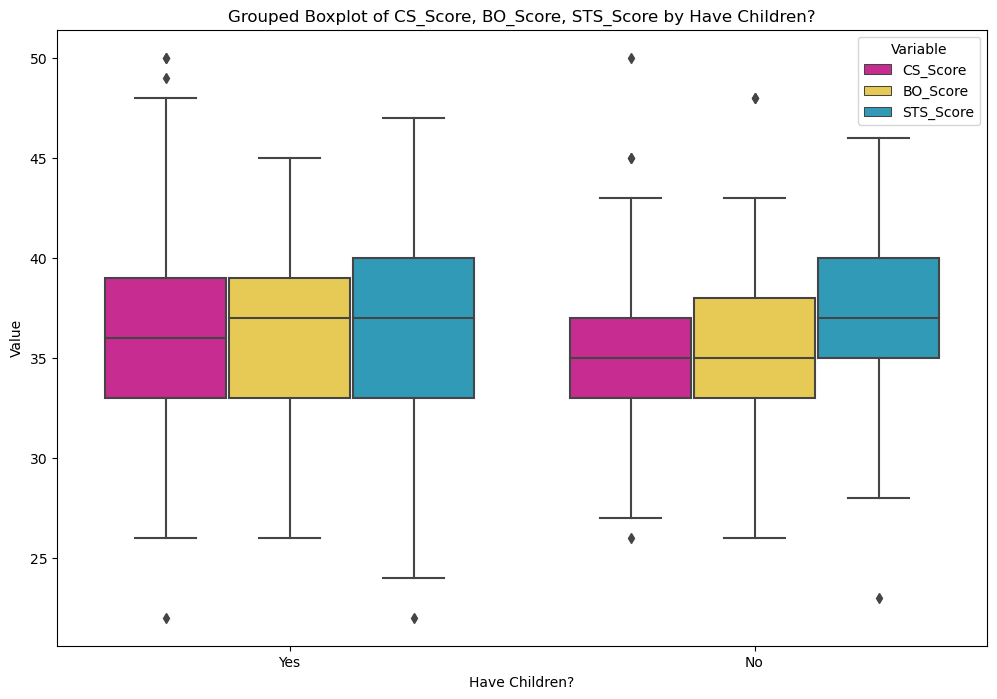

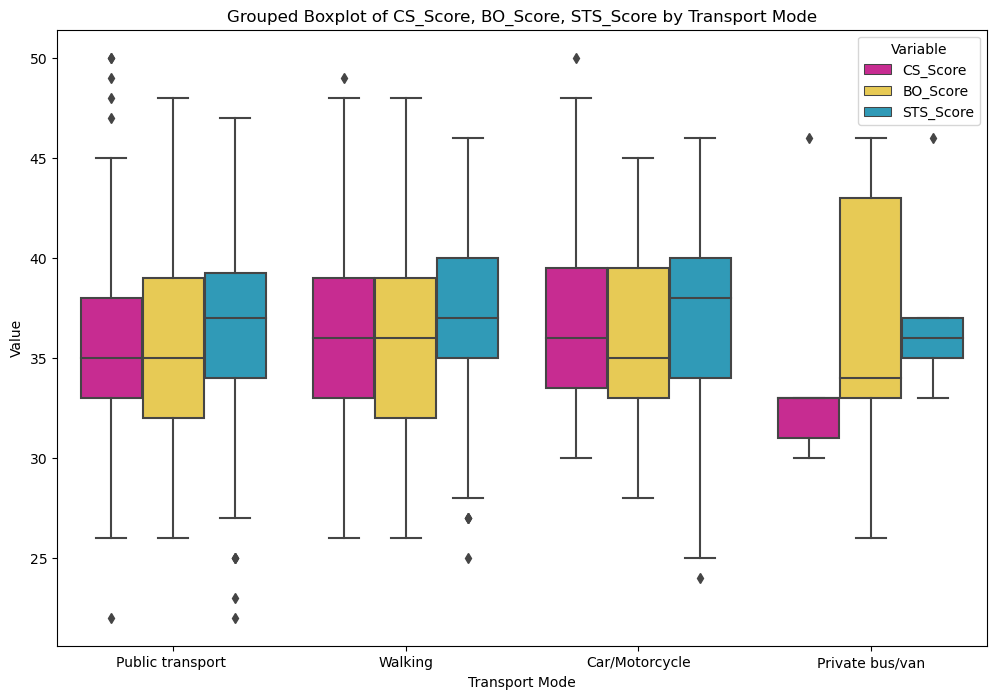

In [24]:
nominal_variables = ['Hospital', 'Main Unit', 'Ethnicity','Gender','Highest Educational Level','Marital Status','Have Children?','Transport Mode']
response_variables = ['CS_Score', 'BO_Score', 'STS_Score']

for nominal_var in nominal_variables:
    # Exclude 'Not relevant' category for 'Have Children?' variable
    if nominal_var == 'Have Children?':
        df_nominal = df[df[nominal_var] != 'Not relevant'][[nominal_var] + response_variables]
    else:
        df_nominal = df[[nominal_var] + response_variables]
    
    # Melt the DataFrame to create a 'variable' column for response variables
    df_melted = pd.melt(df_nominal, id_vars=[nominal_var], var_name='Variable', value_name='Value')
    
    # Define a custom color palette
    custom_palette = {'CS_Score': '#E11299', 'BO_Score': '#FFD93D', 'STS_Score': '#19A7CE'}
    
    # Plot a grouped box plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=nominal_var, y='Value', hue='Variable', data=df_melted, palette=custom_palette)
    plt.title(f'Grouped Boxplot of {", ".join(response_variables)} by {nominal_var}')
    plt.show()

## Boxplots of Score distributions w.r.t. each category of ordinal variables

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


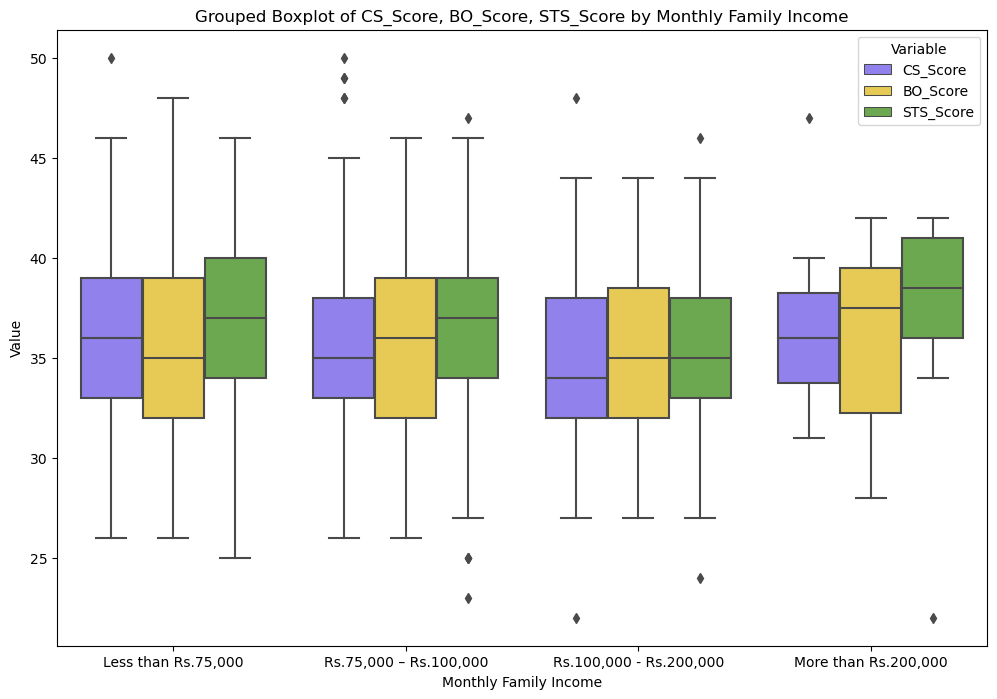

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


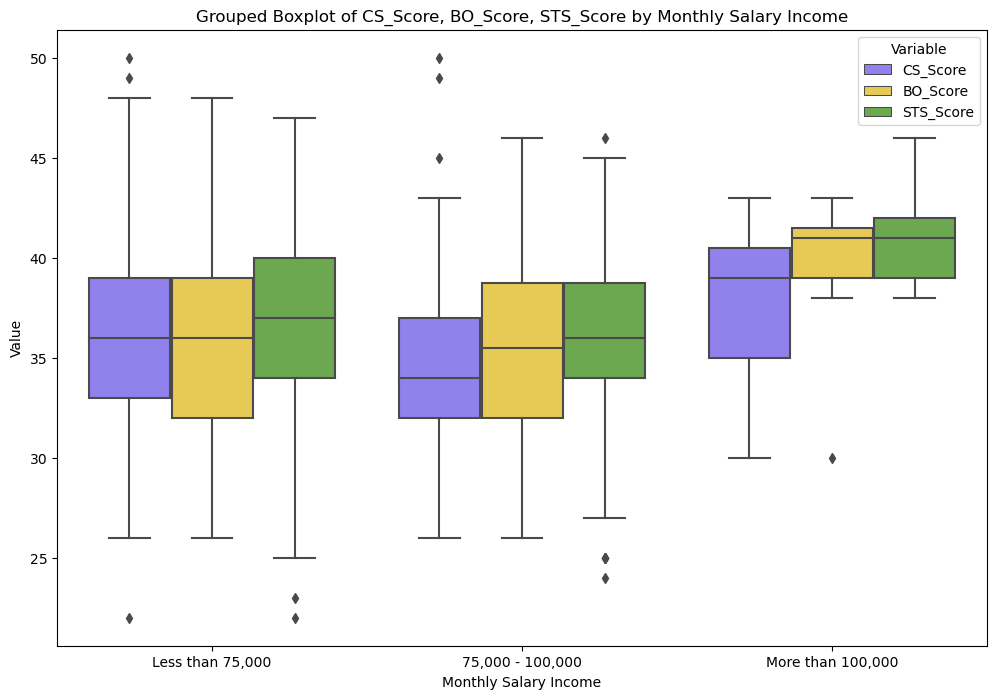

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


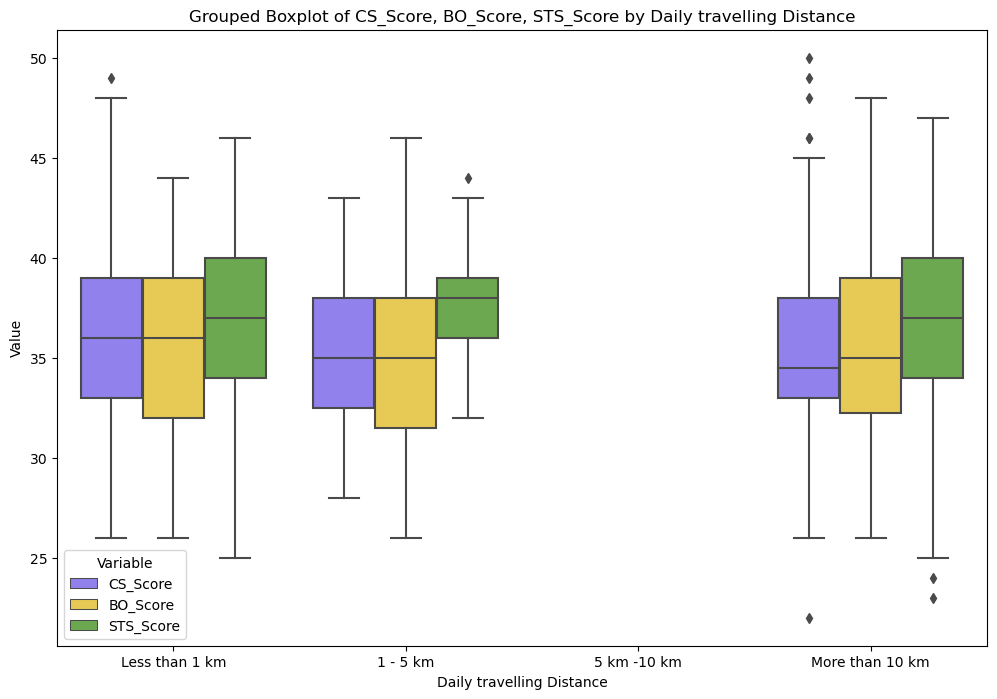

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


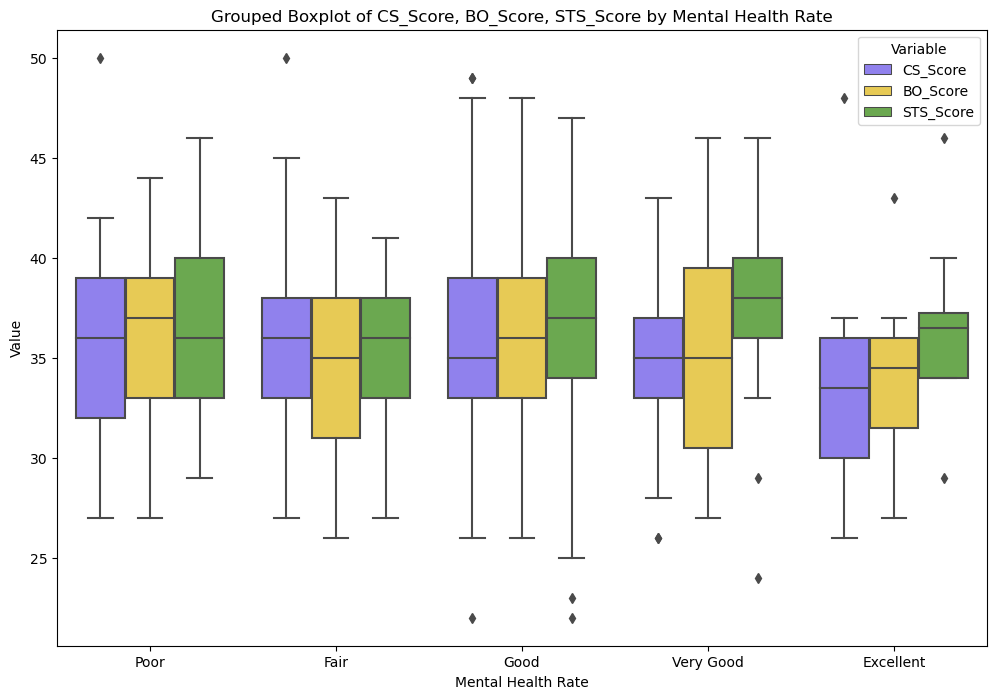

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


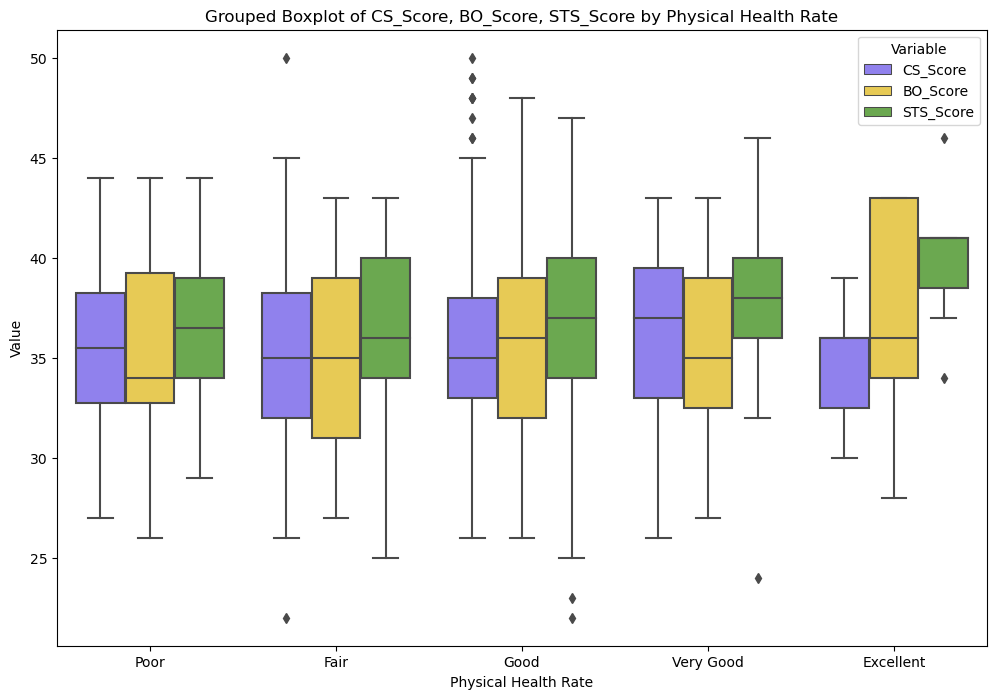

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


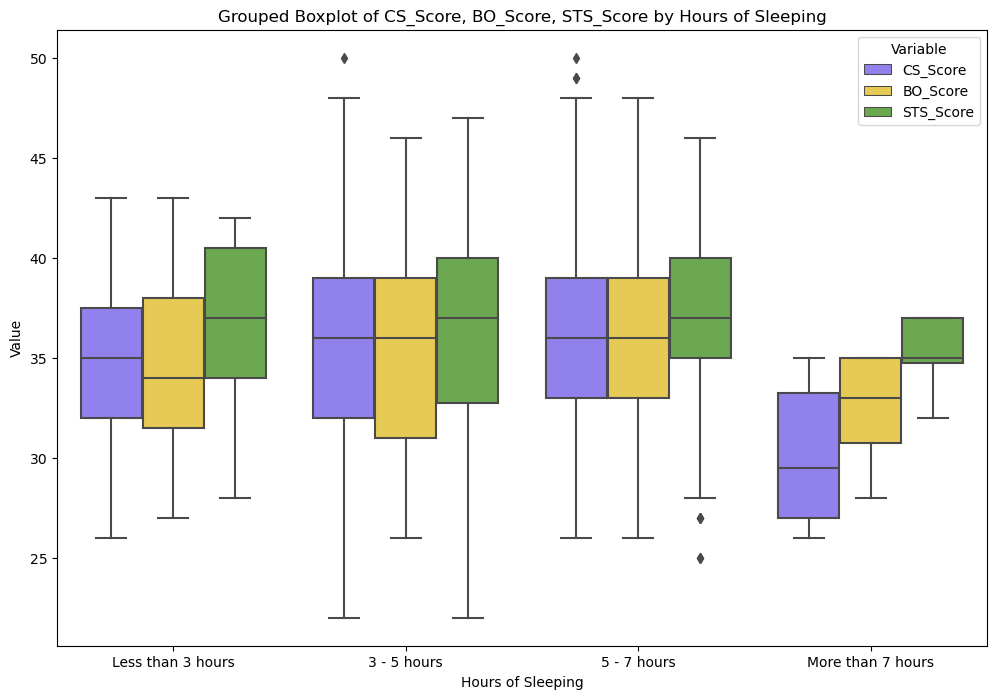

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


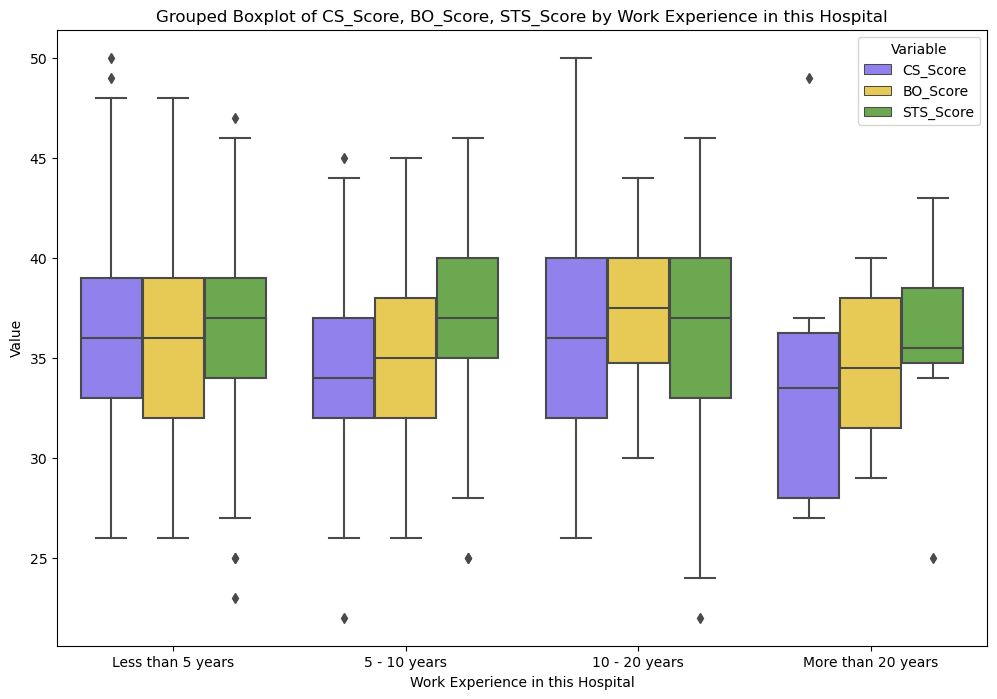

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


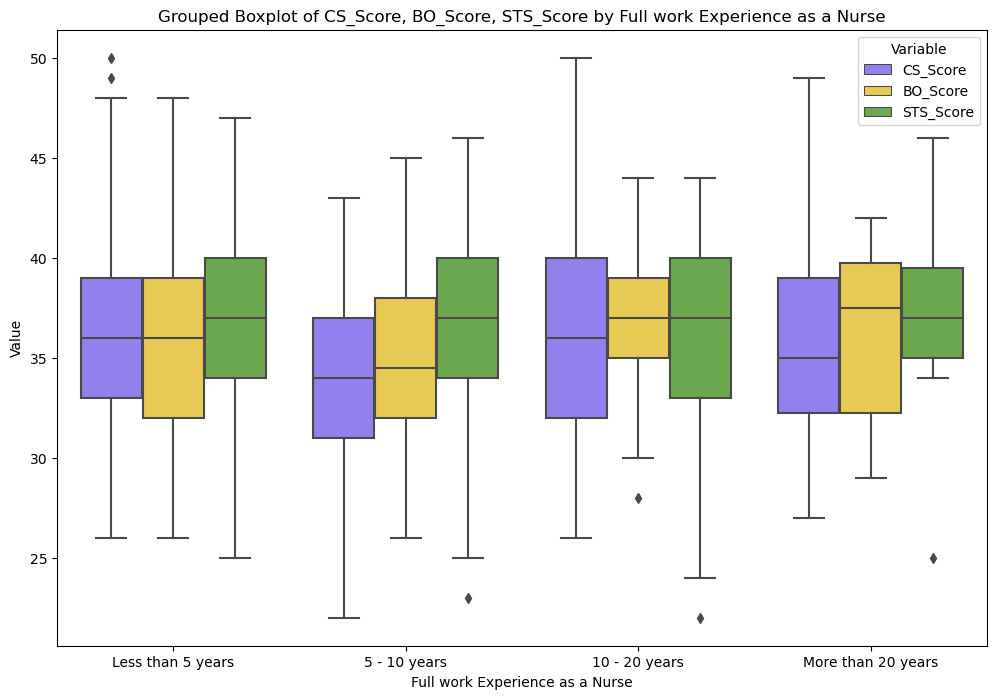

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


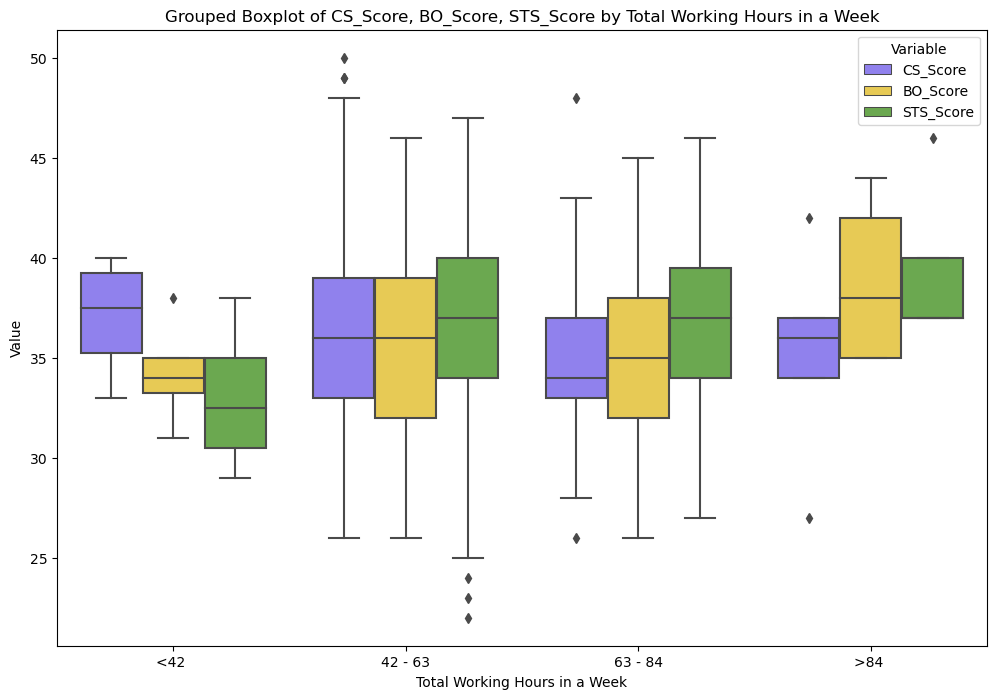

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


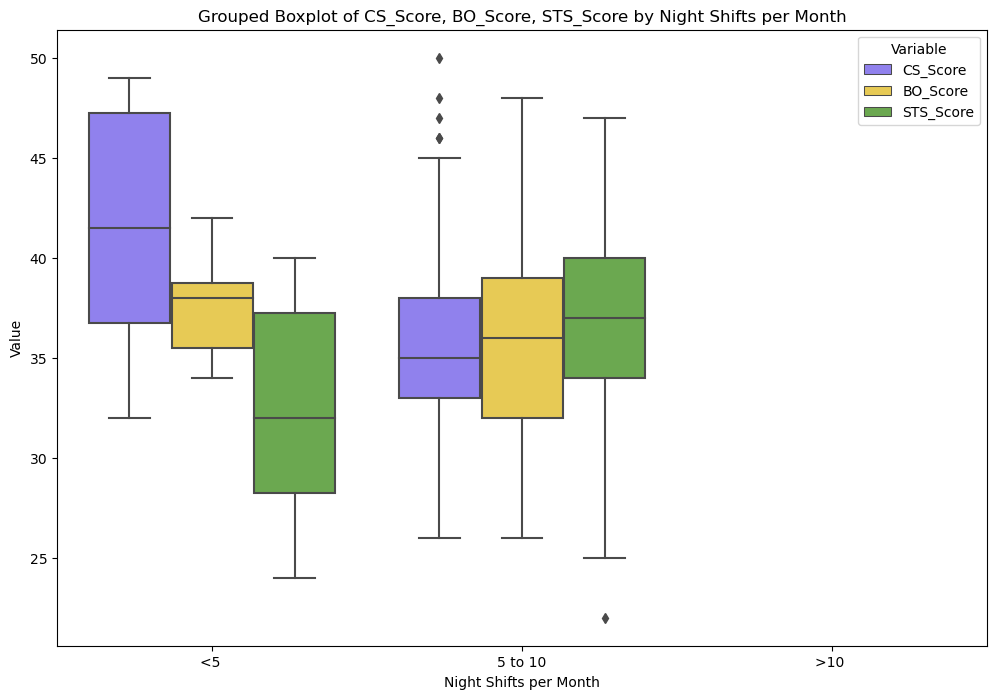

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


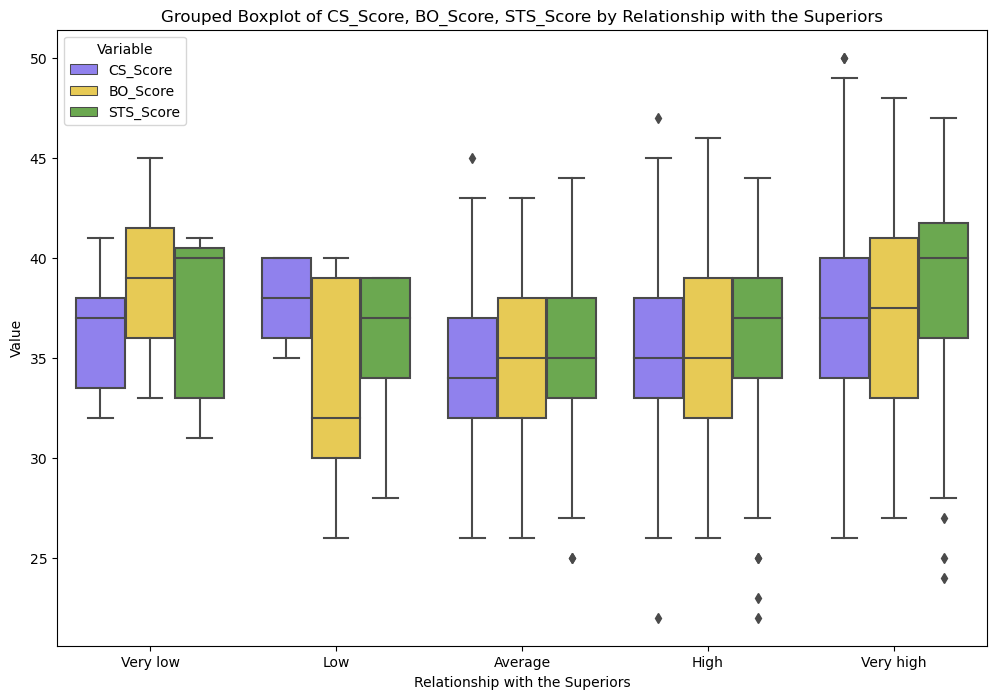

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


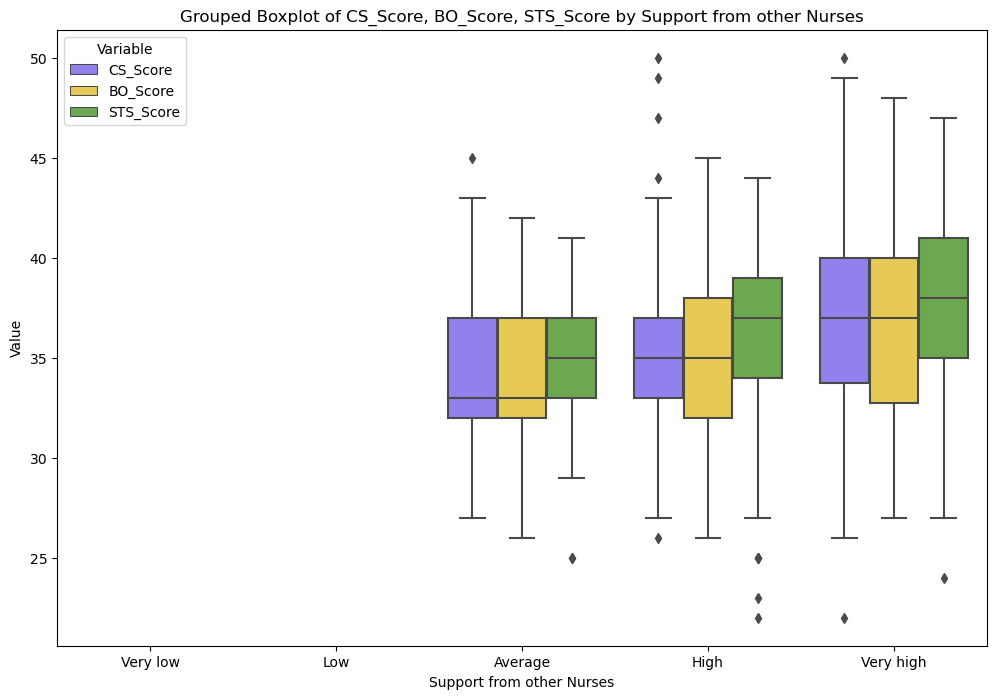

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


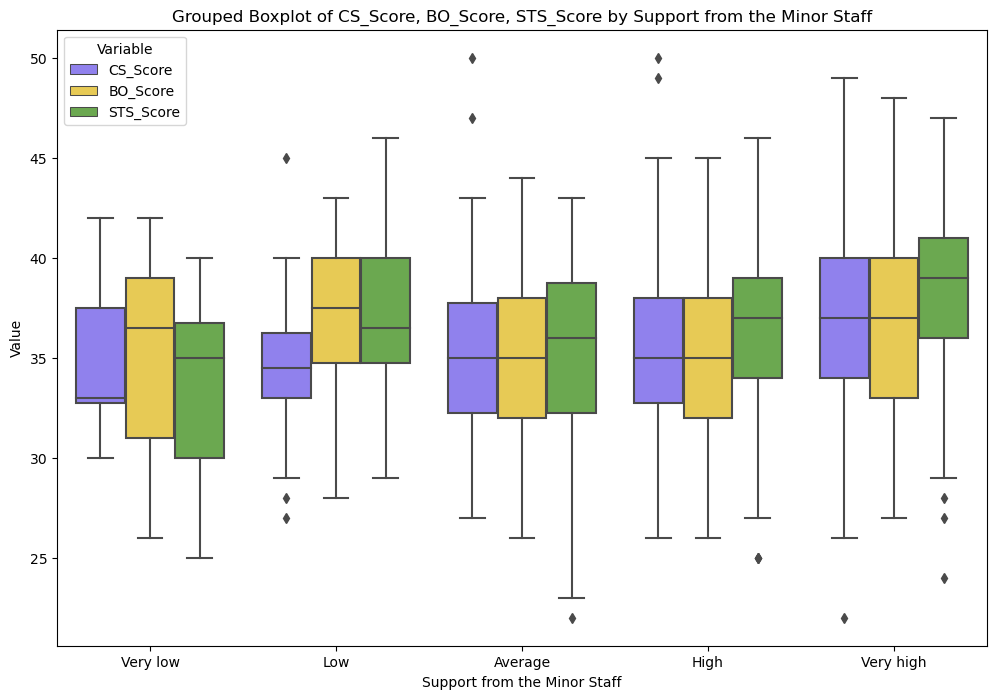

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


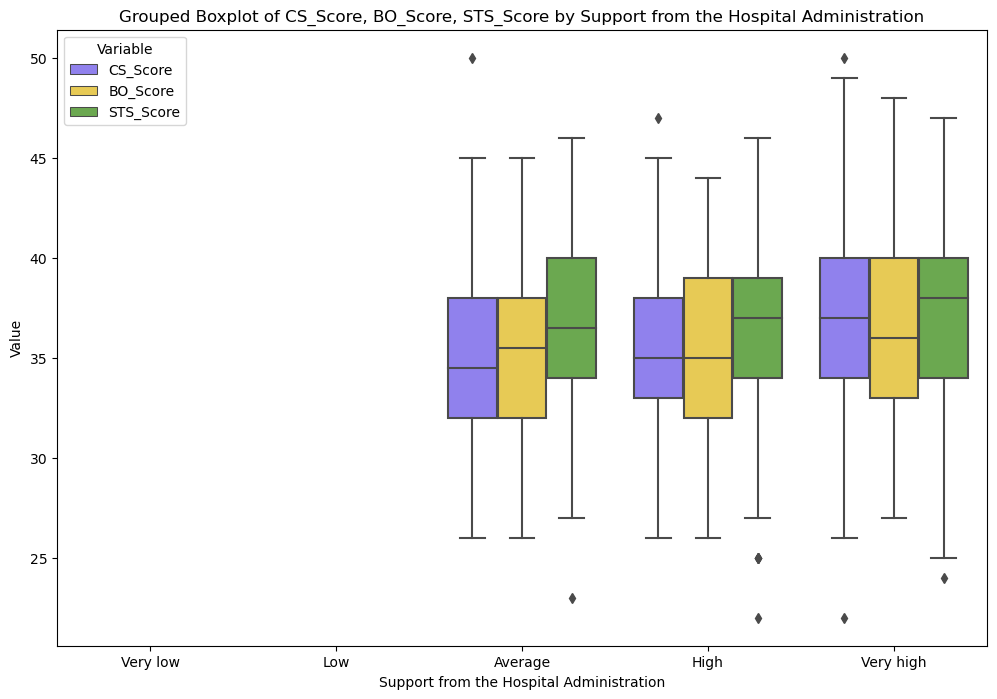

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


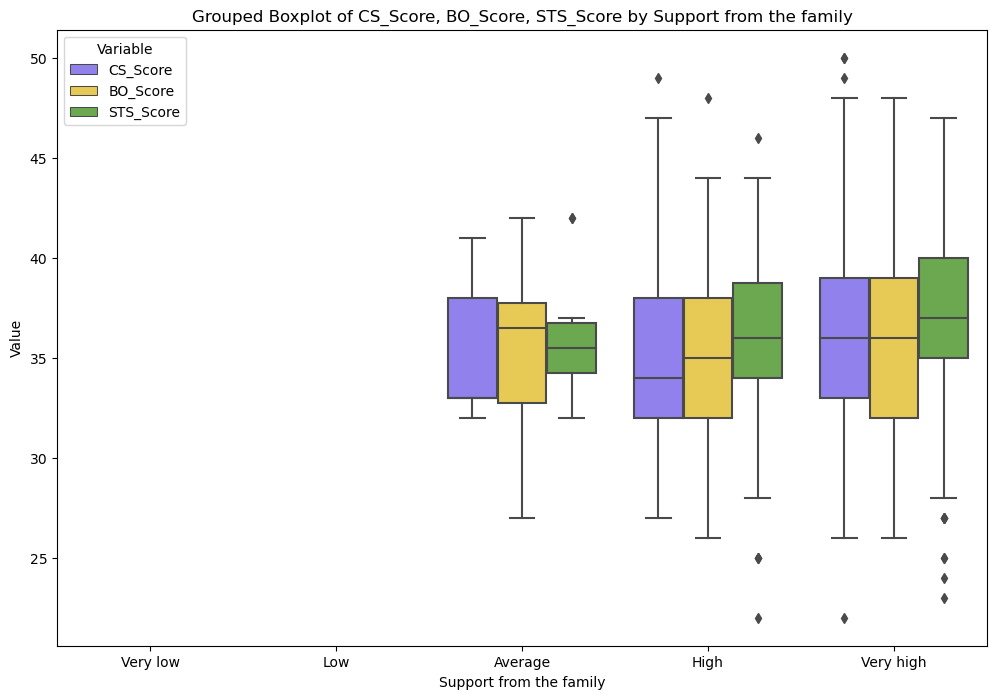

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


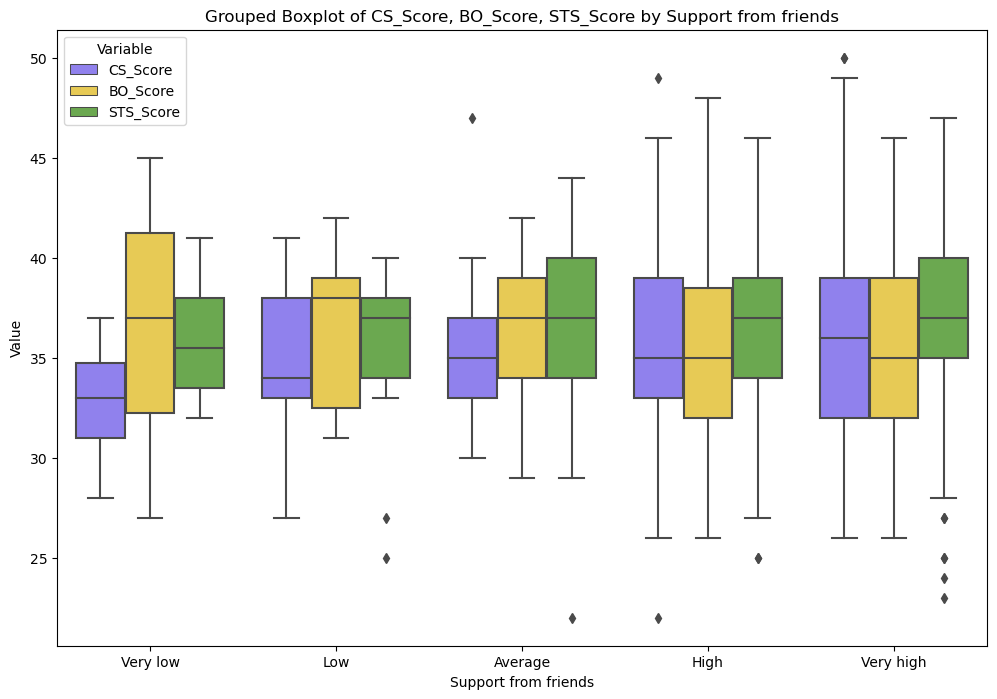

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


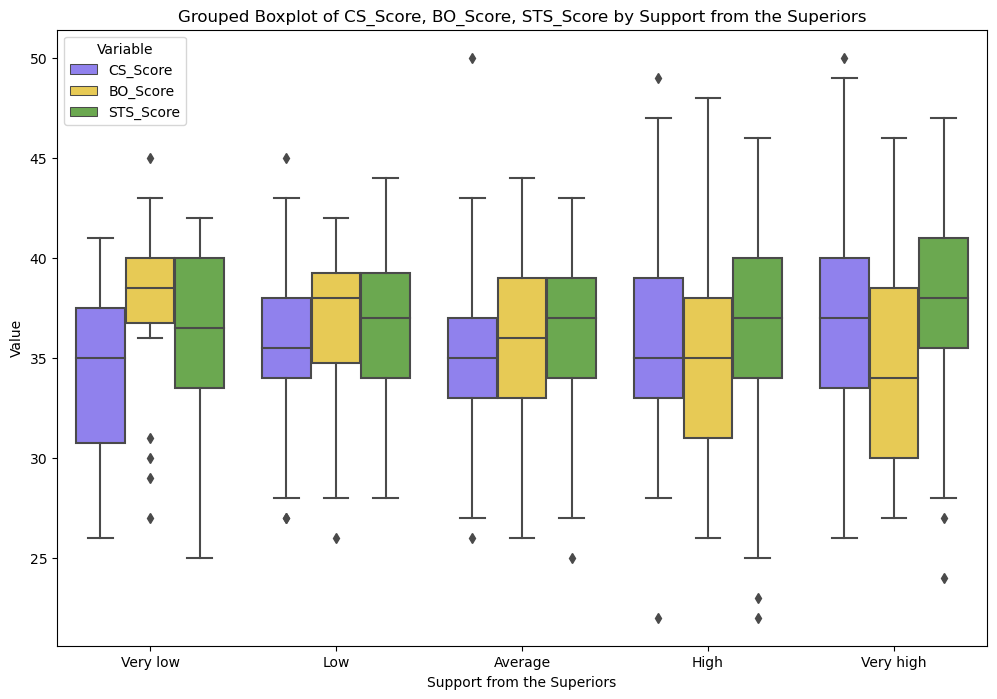

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


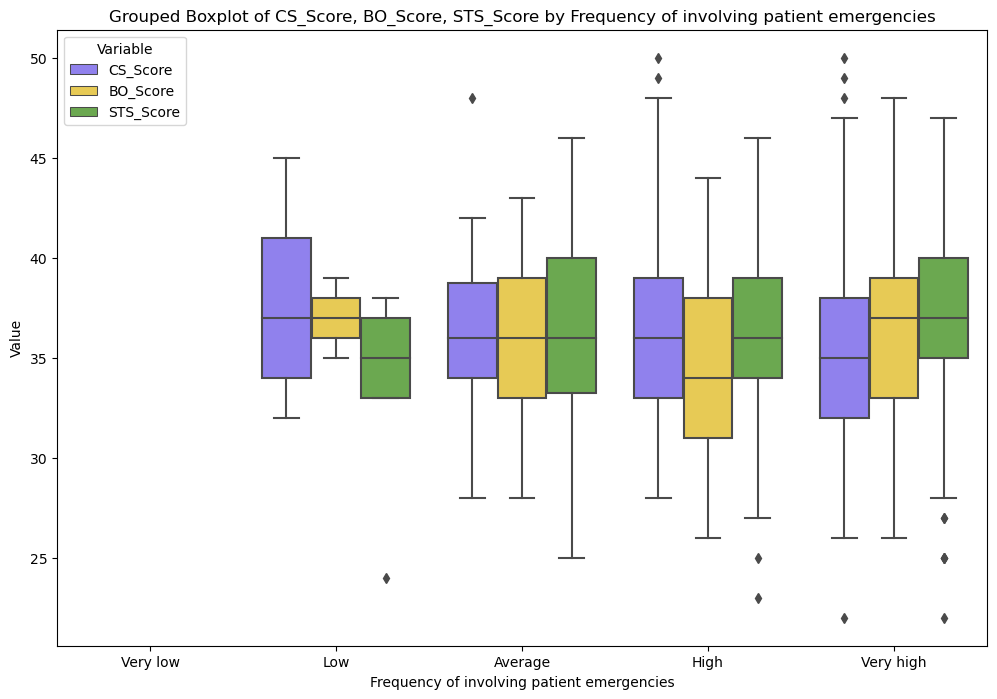

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


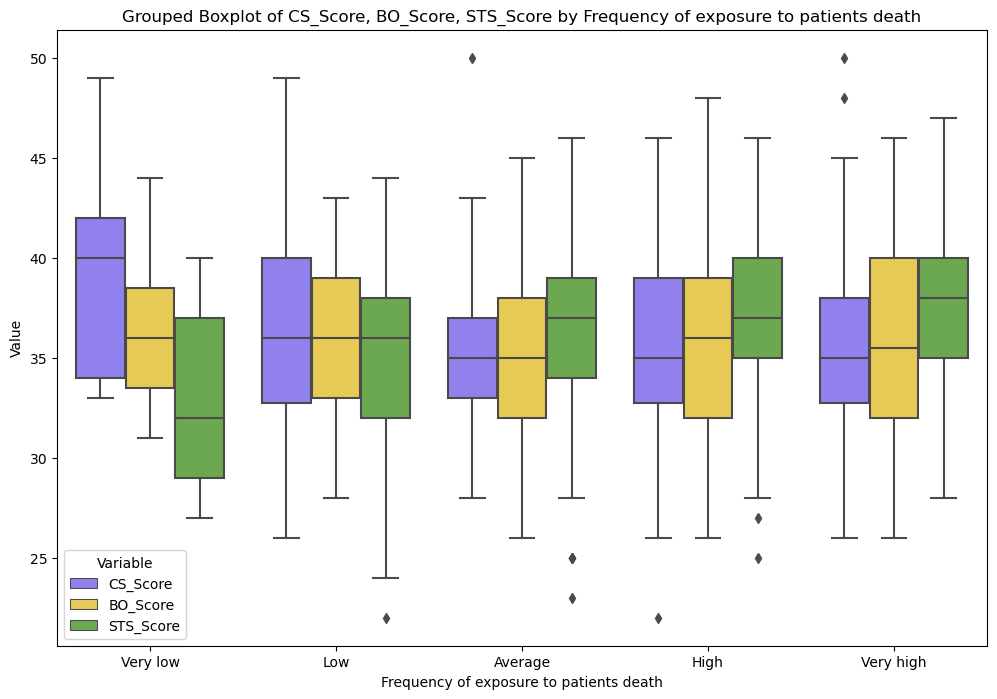

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


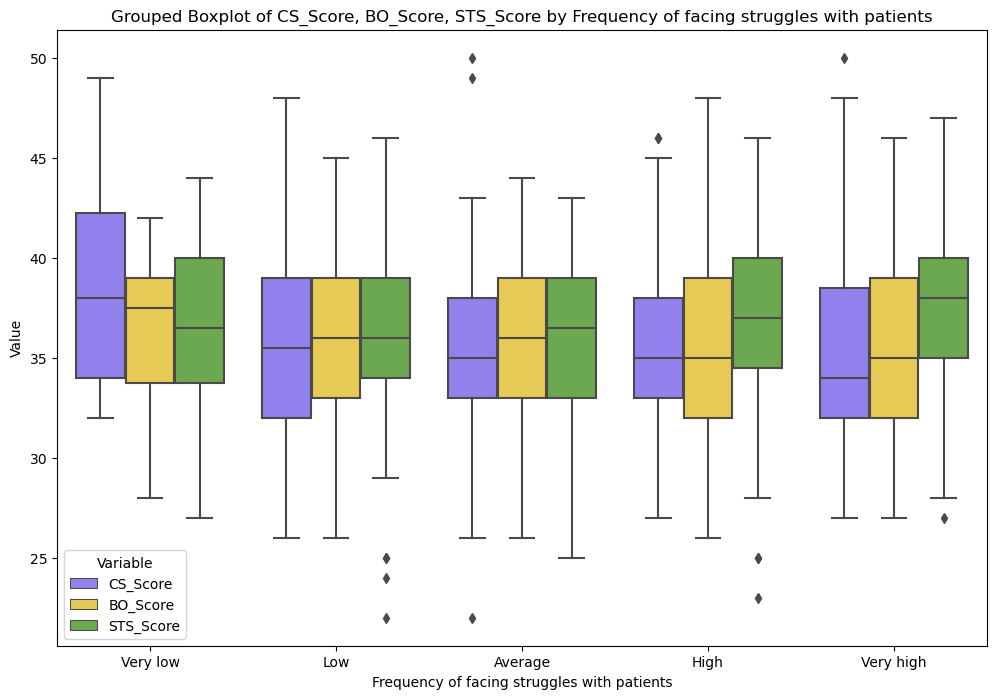

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


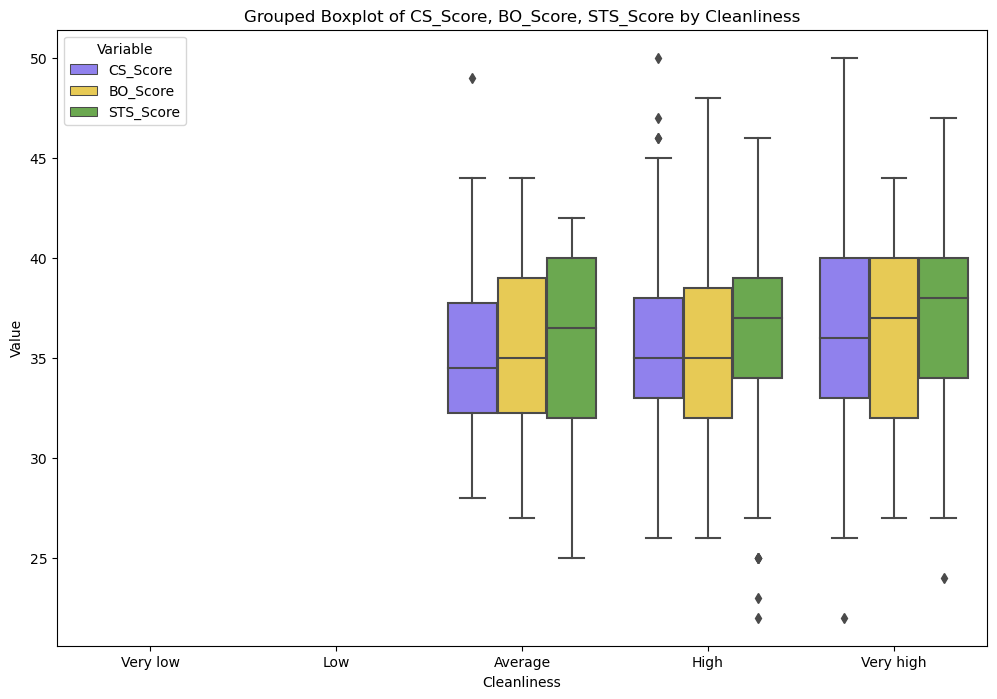

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


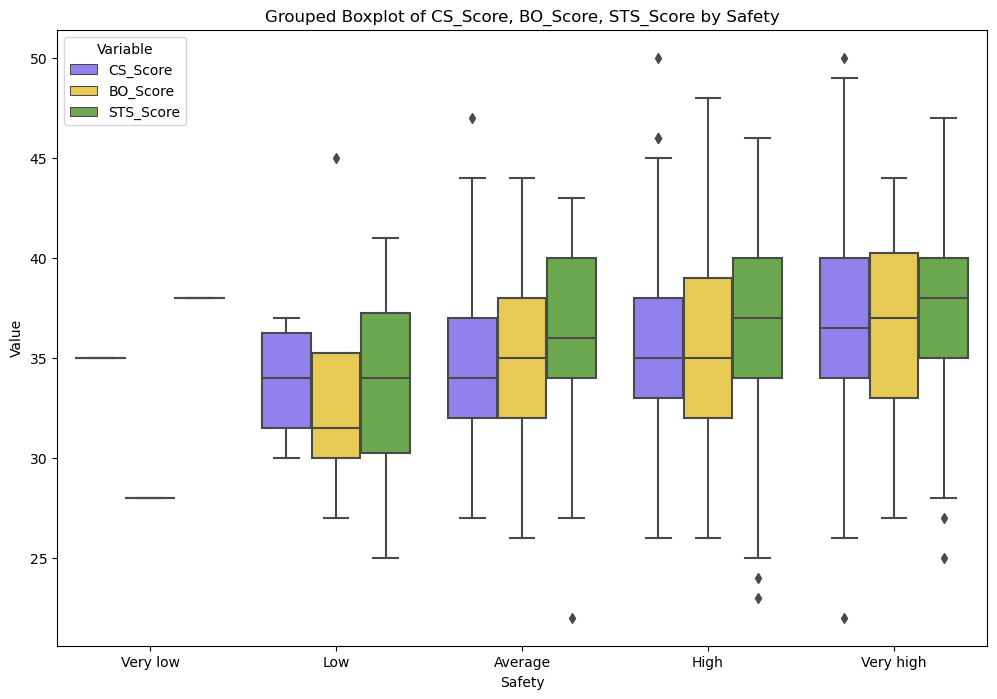

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


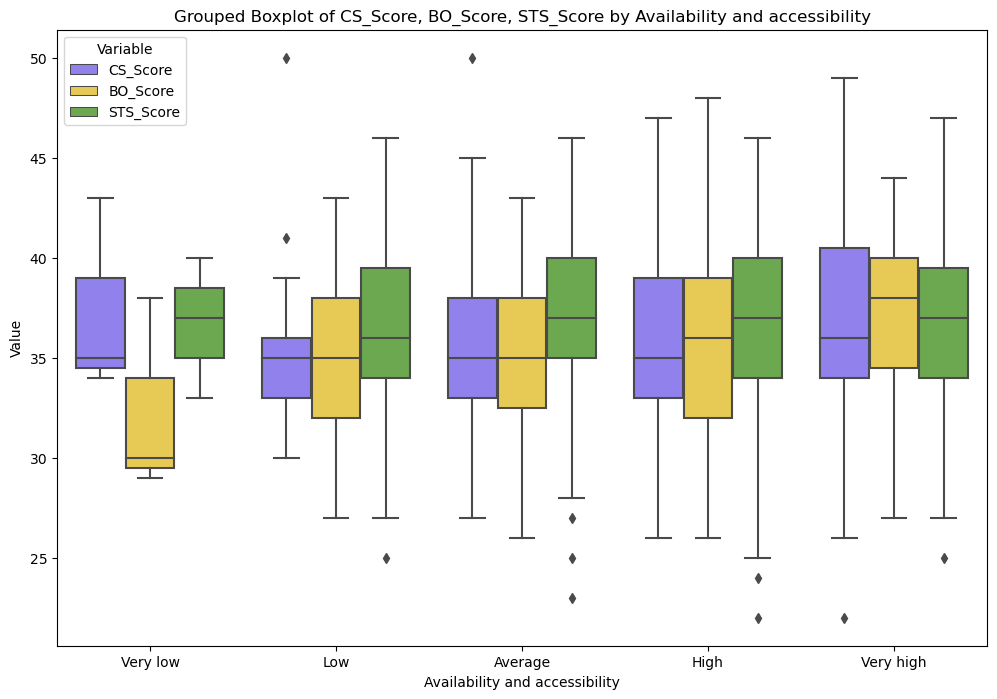

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


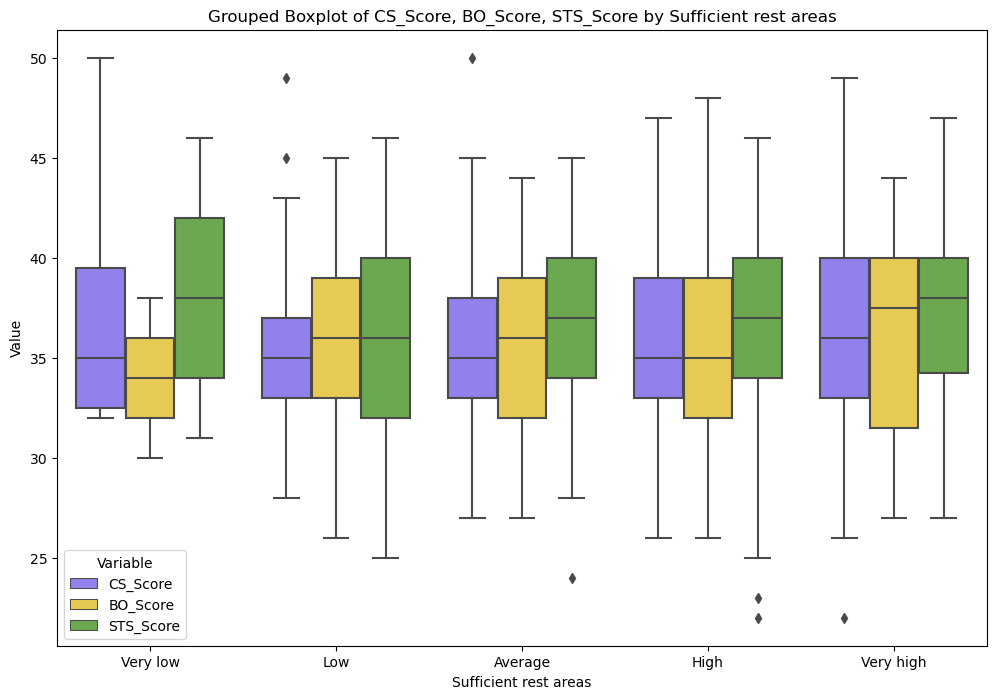

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
ordinal_variables_order = {
    'Monthly Family Income': ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 - Rs.200,000','More than Rs.200,000'],
    'Monthly Salary Income': ['Less than 75,000', '75,000 - 100,000', 'More than 100,000'],
    'Daily travelling Distance': ['Less than 1 km', '1 - 5 km', '5 km -10 km','More than 10 km'],
    'Mental Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Physical Health Rate': ['Poor','Fair','Good','Very Good','Excellent'],
    'Hours of Sleeping': ['Less than 3 hours','3 - 5 hours','5 - 7 hours','More than 7 hours'],
    'Work Experience in this Hospital': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Full work Experience as a Nurse': ['Less than 5 years','5 - 10 years','10 - 20 years','More than 20 years'],
    'Total Working Hours in a Week': ['<42 ','42 - 63','63 - 84','>84 '],
    'Night Shifts per Month': ['<5 ','5 to 10','>10 '],
    'Relationship with the Superiors': ['Very low','Low','Average','High','Very high'],
    'Support from other Nurses': ['Very low','Low','Average','High','Very high'],
    'Support from the Minor Staff': ['Very low','Low','Average','High','Very high'],
    'Support from the Hospital Administration': ['Very low','Low','Average','High','Very high'],
    'Support from the family': ['Very low','Low','Average','High','Very high'],
    'Support from friends': ['Very low','Low','Average','High','Very high'],
    'Support from the Superiors': ['Very low','Low','Average','High','Very high'],
    'Frequency of involving patient emergencies': ['Very low','Low','Average','High','Very high'],
    'Frequency of exposure to patients death': ['Very low','Low','Average','High','Very high'],
    'Frequency of facing struggles with patients': ['Very low','Low','Average','High','Very high'],
    'Cleanliness': ['Very low','Low','Average','High','Very high'],
    'Safety': ['Very low','Low','Average','High','Very high'],
    'Availability and accessibility': ['Very low','Low','Average','High','Very high'],
    'Sufficient rest areas': ['Very low','Low','Average','High','Very high']
}

# Convert ordinal variables to categorical with custom order
for ordinal_var, custom_order in ordinal_variables_order.items():
    df[ordinal_var] = pd.Categorical(df[ordinal_var], categories=custom_order, ordered=True)

response_variables = ['CS_Score', 'BO_Score', 'STS_Score']

# Define a custom color palette
custom_palette = {'#836FFF', '#FFD93D', '#65B741'}
    
for nominal_var in ordinal_variables_order.keys():  # Use the keys of the ordinal_variables_order dictionary
    df_nominal = df[[nominal_var] + response_variables]
    
    # Melt the DataFrame to create a 'variable' column for response variables
    df_melted = pd.melt(df_nominal, id_vars=[nominal_var], var_name='Variable', value_name='Value')
    
    # Plot a grouped box plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=nominal_var, y='Value', hue='Variable', data=df_melted, palette = custom_palette)
    plt.title(f'Grouped Boxplot of {", ".join(response_variables)} by {nominal_var}')
    plt.show()

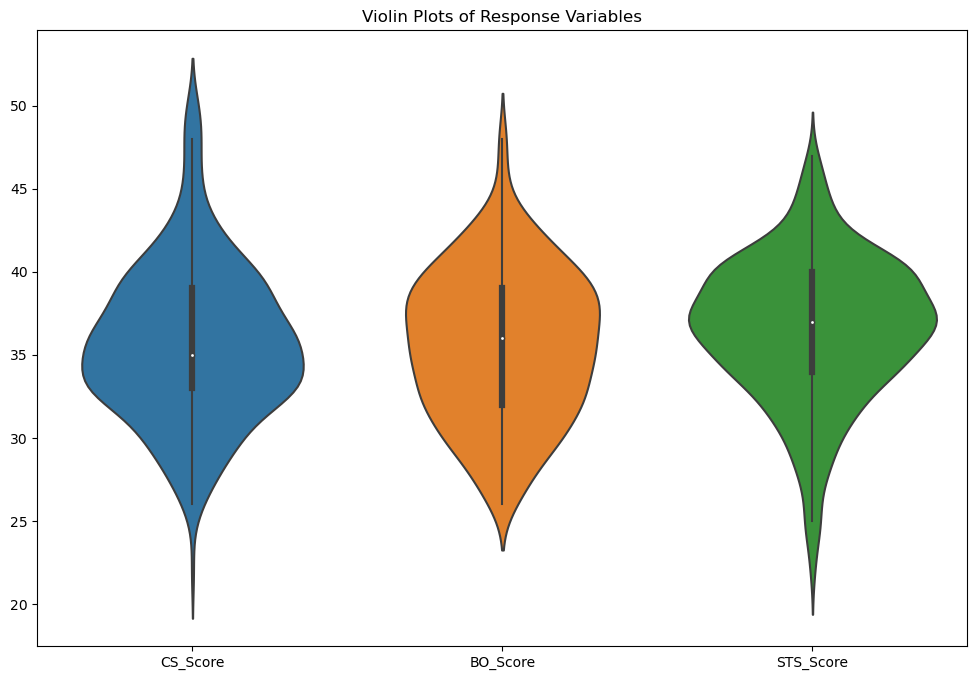

In [26]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df[response_variables])
plt.title('Violin Plots of Response Variables')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


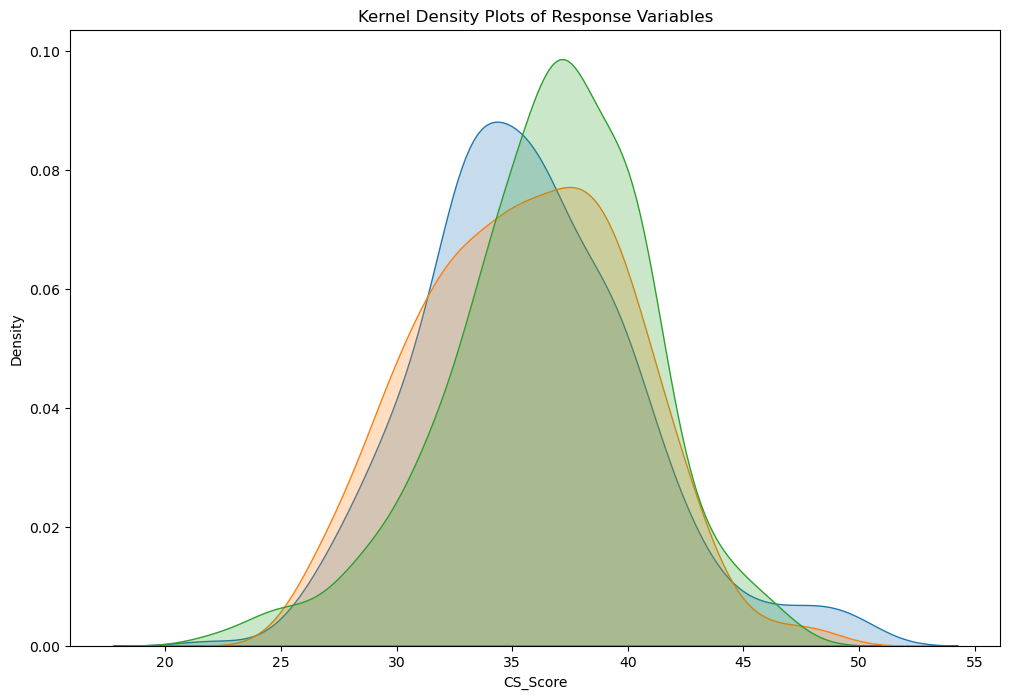

In [27]:
plt.figure(figsize=(12, 8))
for response_var in response_variables:
    sns.kdeplot(df[response_var], label=response_var, fill=True)
plt.title('Kernel Density Plots of Response Variables')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


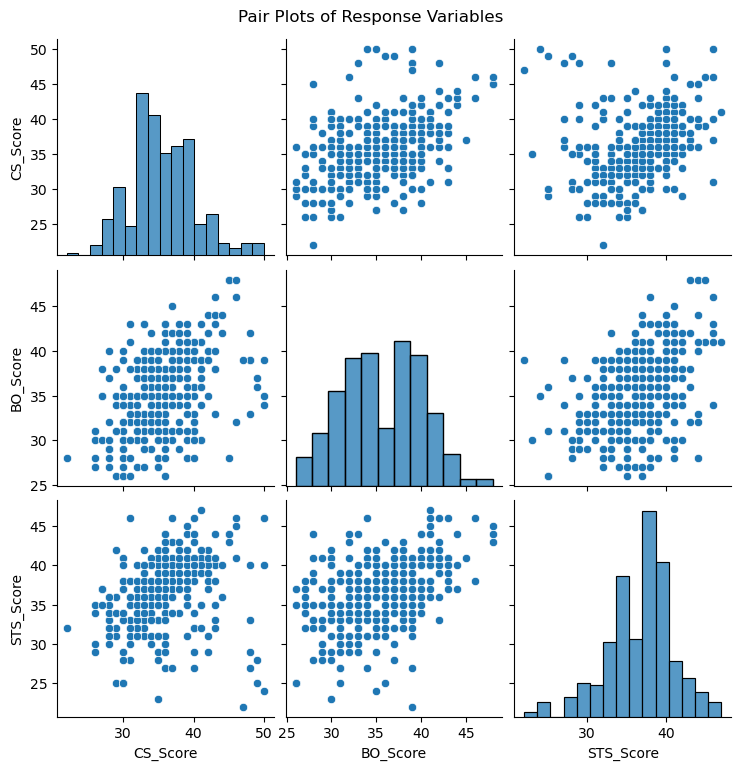

In [28]:
sns.pairplot(df[response_variables])
plt.suptitle('Pair Plots of Response Variables', y=1.02)
plt.show()

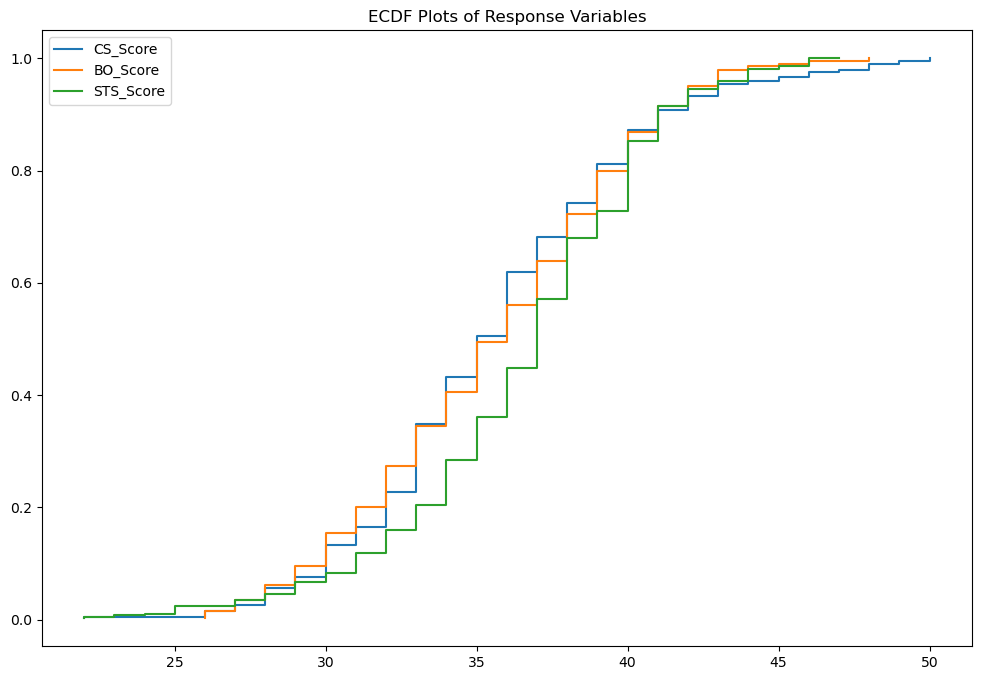

In [29]:
plt.figure(figsize=(12, 8))
for response_var in response_variables:
    sorted_data = np.sort(df[response_var])
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.step(sorted_data, ecdf, label=response_var)

plt.title('ECDF Plots of Response Variables')
plt.legend()
plt.show()